In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score


print('pandas version : ', pd.__version__)
print('numpy version : ', np.__version__)
print('matplotlib version : ', matplotlib.__version__)
print('seaborn version : ', sns.__version__)

# statistic tools
import statsmodels.api as sm
import scipy.stats as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


pandas version :  2.2.2
numpy version :  1.26.4
matplotlib version :  3.9.0
seaborn version :  0.13.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
680,680,78.01,26,439105800.0,200.71,Laki-Laki,3/28/2016 2:29,No,Palembang,Sumatra Selatan,Fashion
428,428,60.53,29,397316360.0,123.28,Perempuan,5/9/2016 10:21,Yes,Tangerang Selatan,Banten,Electronic
499,499,58.35,37,491630650.0,132.63,Perempuan,6/12/2016 21:21,Yes,Bandung,Jawa Barat,Food
994,994,43.70,28,441888720.0,173.01,Perempuan,4/4/2016 3:57,Yes,Tasikmalaya,Jawa Barat,Fashion
687,687,73.27,28,471109730.0,216.24,Laki-Laki,5/22/2016 15:17,No,Surabaya,Jawa Timur,Bank
861,861,68.25,29,492273600.0,220.08,Perempuan,2/15/2016 16:18,No,Batam,Kepulauan Riau,Bank
450,450,43.41,28,414008140.0,160.73,Perempuan,2/5/2016 15:26,Yes,Tangerang Selatan,Banten,Electronic
854,854,75.03,34,250351430.0,255.57,Perempuan,5/29/2016 18:12,Yes,Medan,Sumatra Utara,Otomotif
187,187,77.95,31,438010160.0,233.65,Laki-Laki,6/2/2016 21:02,No,Palembang,Sumatra Selatan,Travel
267,267,72.44,34,493830120.0,230.14,Perempuan,4/15/2016 14:45,No,Tangerang Selatan,Banten,House


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [6]:
df.nunique()

Unnamed: 0                  1000
Daily Time Spent on Site     890
Age                           43
Area Income                  987
Daily Internet Usage         955
Male                           2
Timestamp                    997
Clicked on Ad                  2
city                          30
province                      16
category                      10
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(1000, 11)

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.0,1000,"[0, 1, 2, 3, 4]"
1,Daily Time Spent on Site,float64,13,1.3,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
2,Age,int64,0,0.0,43,"[35, 31, 26, 29, 23]"
3,Area Income,float64,13,1.3,987,"[432837300.0, 479092950.00000006, 418501580.0,..."
4,Daily Internet Usage,float64,11,1.1,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
5,Male,object,3,0.3,2,"[Perempuan, Laki-Laki, nan]"
6,Timestamp,object,0,0.0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:3..."
7,Clicked on Ad,object,0,0.0,2,"[No, Yes]"
8,city,object,0,0.0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
9,province,object,0,0.0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


In [10]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

In [11]:
num = ['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
cat = ['Male', 'Clicked on Ad', 'city', 'province', 'category']
time = ['Timestamp']

# Exploratory Data Analysis

## Pendekatan Numerik

In [14]:
df[num].describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [15]:
df[cat].describe()

,Male,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


## Univariate Analysis

#### Numerical Features

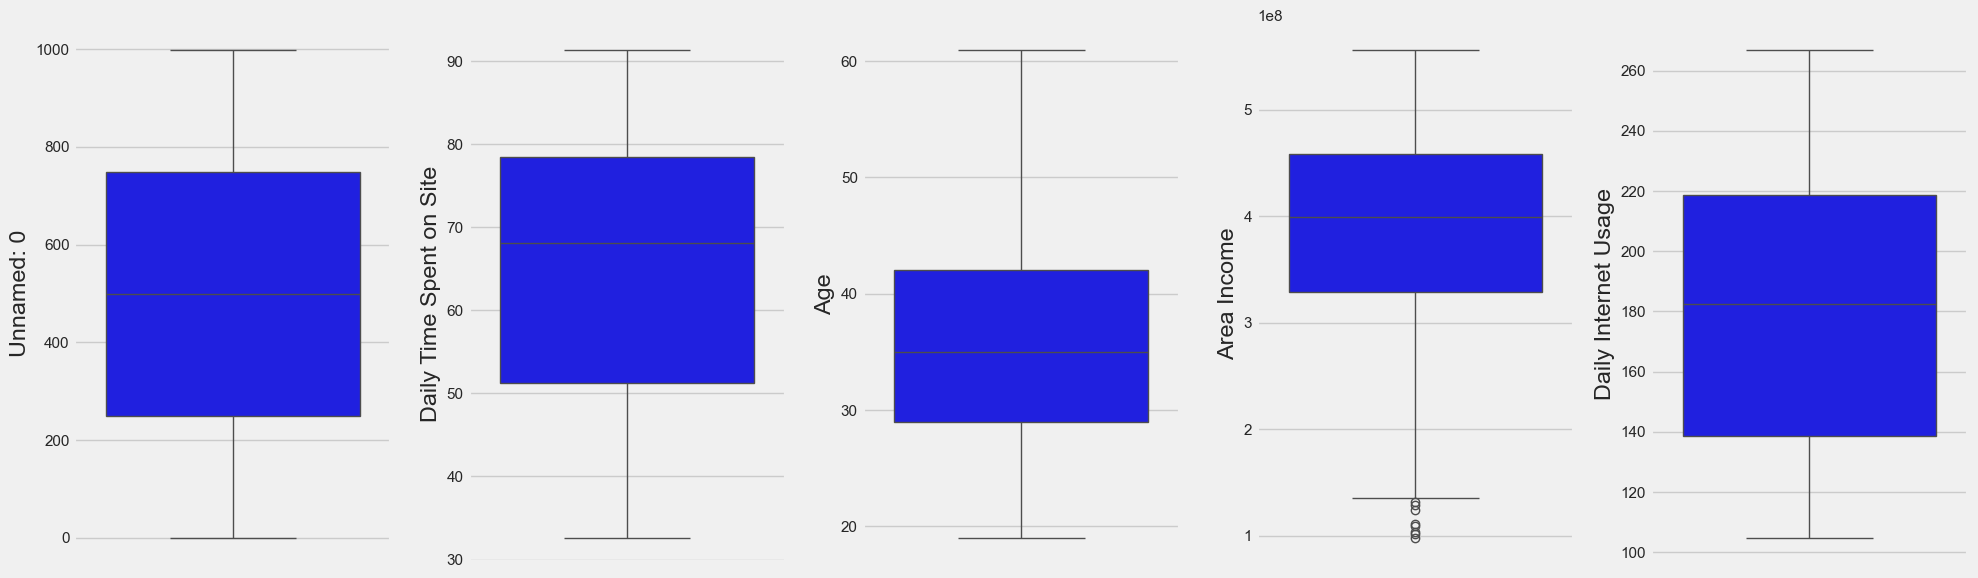

In [18]:
plt.figure(figsize=(20,6))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='blue', orient='v')
    plt.tight_layout()

In [19]:
# Membuat DataFrame kosong untuk menyimpan hasil kuartil
quartiles_df = pd.DataFrame(columns=['Feature', 'Q1', 'Q3', 'IQR'])

# Misalkan 'df' adalah DataFrame asli dan 'num' berisi nama-nama kolom numerik yang ingin kamu hitung kuartilnya
for column_name in num:
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk setiap kolom
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Menghitung interquartile range (IQR)
    IQR = Q3 - Q1

    # Membuat DataFrame sementara dengan data baru
    new_row = pd.DataFrame({'Feature': [column_name], 'Q1': [Q1], 'Q3': [Q3], 'IQR': [IQR]})

    # Menambahkan baris baru ke DataFrame quartiles_df menggunakan concat
    quartiles_df = pd.concat([quartiles_df, new_row], ignore_index=True)

# Menampilkan tabel kuartil dan IQR
print(quartiles_df)

                    Feature            Q1            Q3           IQR
0                Unnamed: 0  2.497500e+02  7.492500e+02  4.995000e+02
1  Daily Time Spent on Site  5.127000e+01  7.846000e+01  2.719000e+01
2                       Age  2.900000e+01  4.200000e+01  1.300000e+01
3               Area Income  3.286330e+08  4.583554e+08  1.297225e+08
4      Daily Internet Usage  1.387100e+02  2.187900e+02  8.008000e+01


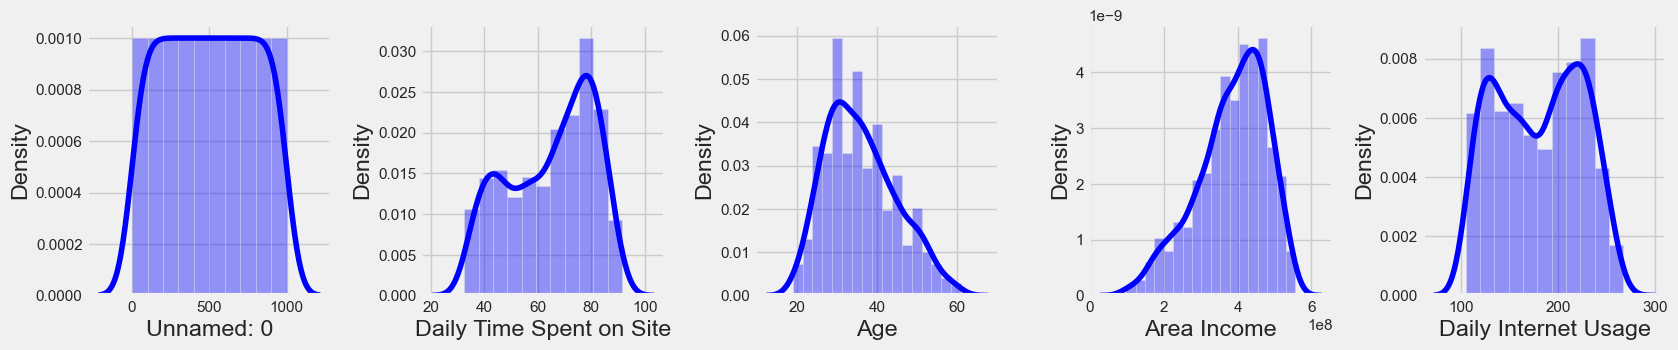

In [20]:
# cek distribusi menggunakan distplot:
plt.figure(figsize=(17, 10))
for i in range(0, len(num)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[num[i]], color = 'blue')
    plt.tight_layout()
plt.show()

In [21]:
# Menghitung skewness dan memberi label skewed atau tidak
for column in ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']:
    skewness_value = df[column].skew()
    if skewness_value > 0.5:
        label = 'Positively Skewed'
    elif skewness_value < -0.5:
        label = 'Negatively Skewed'
    else:
        label = 'Fairly Symmetrical'
    
    print(f'Skewness for {column}: {skewness_value:.2f} - {label}')

Skewness for Daily Time Spent on Site: -0.37 - Fairly Symmetrical
Skewness for Age: 0.48 - Fairly Symmetrical
Skewness for Area Income: -0.64 - Negatively Skewed
Skewness for Daily Internet Usage: -0.03 - Fairly Symmetrical


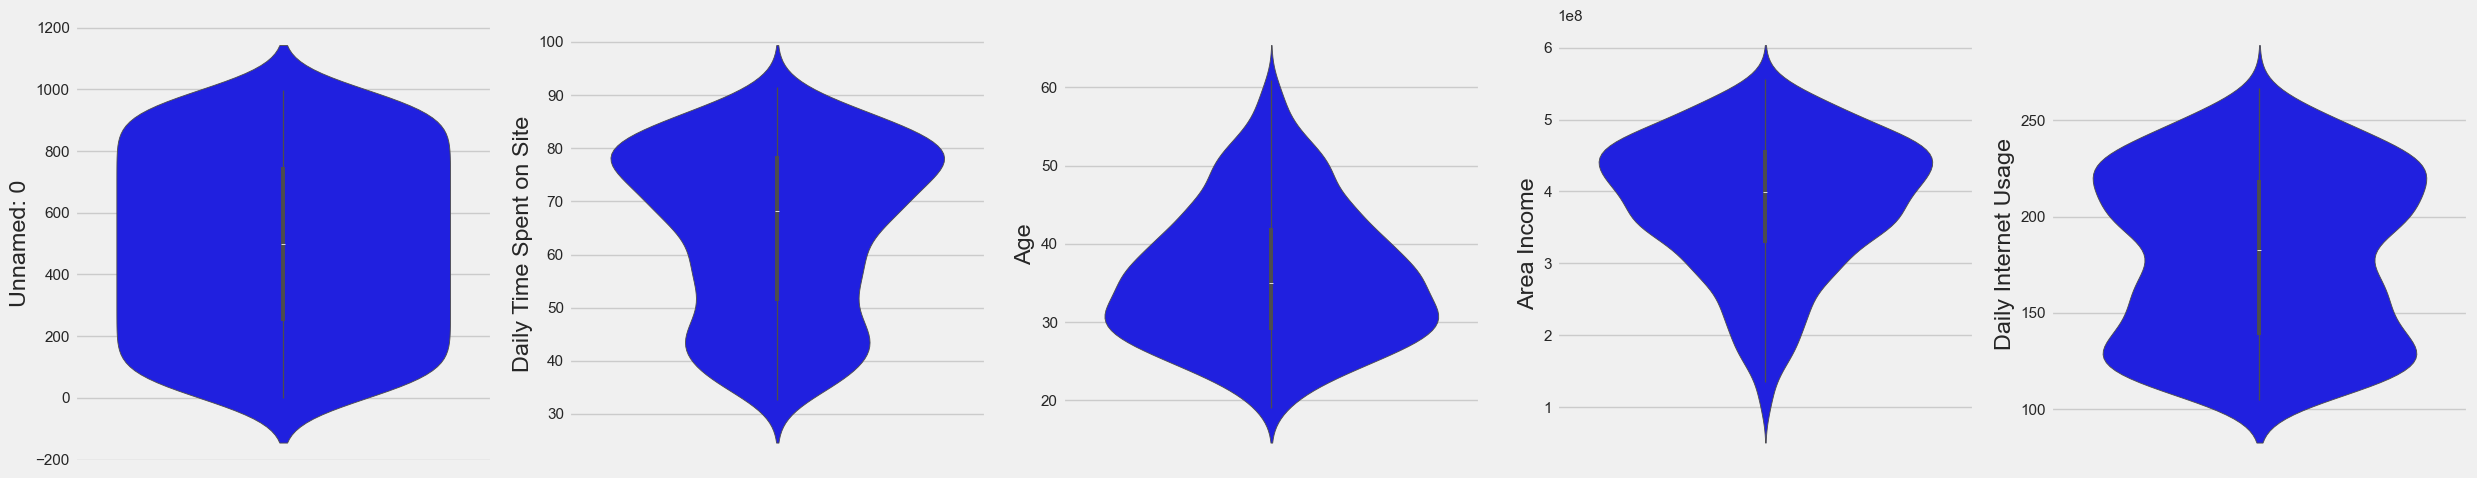

In [22]:
# #violin plot untuk tahu distribus + outlier 
plt.figure(figsize=(25, 5))
for i in range (0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='blue', orient='v')
    plt.tight_layout()

#### Categorical Features

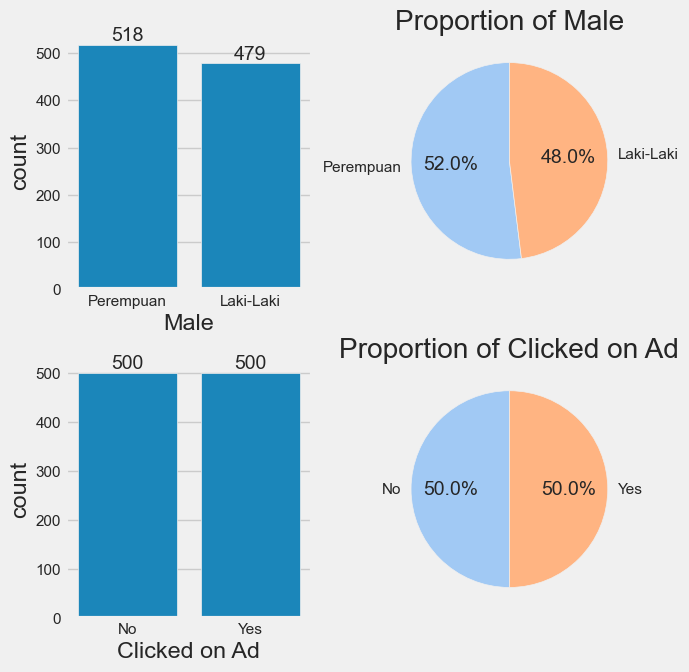

In [24]:
import math 

x = ['Male', 'Clicked on Ad']

# Membuat figure yang lebih besar untuk menampung bar chart dan pie chart
plt.figure(figsize=(7, 7))

for i in range(0, len(x)):
    # Subplot untuk Bar Chart
    plt.subplot(math.ceil(len(x)/1), 2, 2*i+1)  # Bar Chart pada posisi ganjil
    plot = sns.countplot(data=df, x=x[i])
    
    # Menambahkan anotasi angka di atas setiap bar
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.0f}', ha="center", va="bottom")

    # Data untuk Pie Chart
    value_counts = df[x[i]].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    
    # Subplot untuk Pie Chart
    plt.subplot(math.ceil(len(x)/1), 2, 2*i+2)  # Pie Chart pada posisi genap
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Proportion of {x[i]}')

plt.tight_layout()
plt.show()

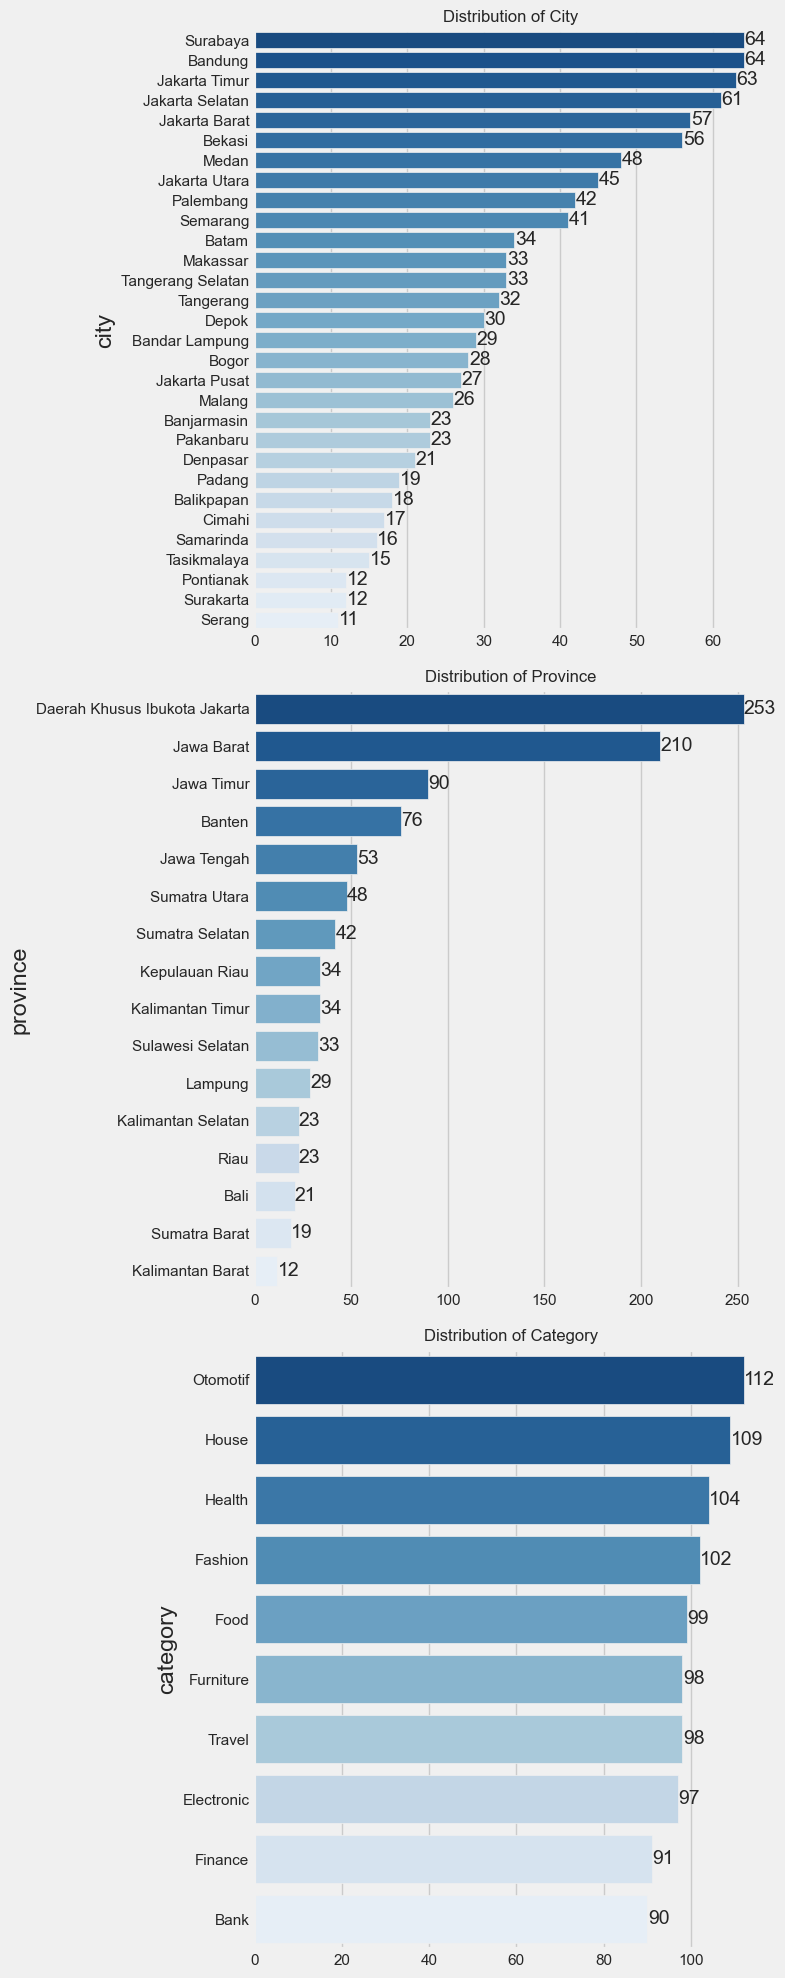

In [25]:
y = ['city', 'province', 'category']
plt.figure(figsize=(8, 20))

for i in range(0, len(y)):
    plt.subplot(math.ceil(len(y)/1), 1, i+1)
    
    # Menghitung frekuensi
    counts = df[y[i]].value_counts()
    
    # Membalikkan urutan colormap dari biru ke putih
    colors = plt.cm.Blues(np.linspace(0.9, 0.1, len(counts)))  # dari putih ke biru

    # Membuat diagram batang horizontal
    plot = sns.barplot(x=counts.values, y=counts.index, palette=colors)
    
    # Menambahkan anotasi angka di atas setiap bar
    for p in plot.patches:
        width = p.get_width()
        plot.text(width + 0.1, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha="left", va="center")

    # Menambahkan judul untuk setiap subplot
    plt.title(f'Distribution of {y[i].capitalize()}', fontsize=12)

plt.tight_layout()
plt.show()

## Bivariate Analysis

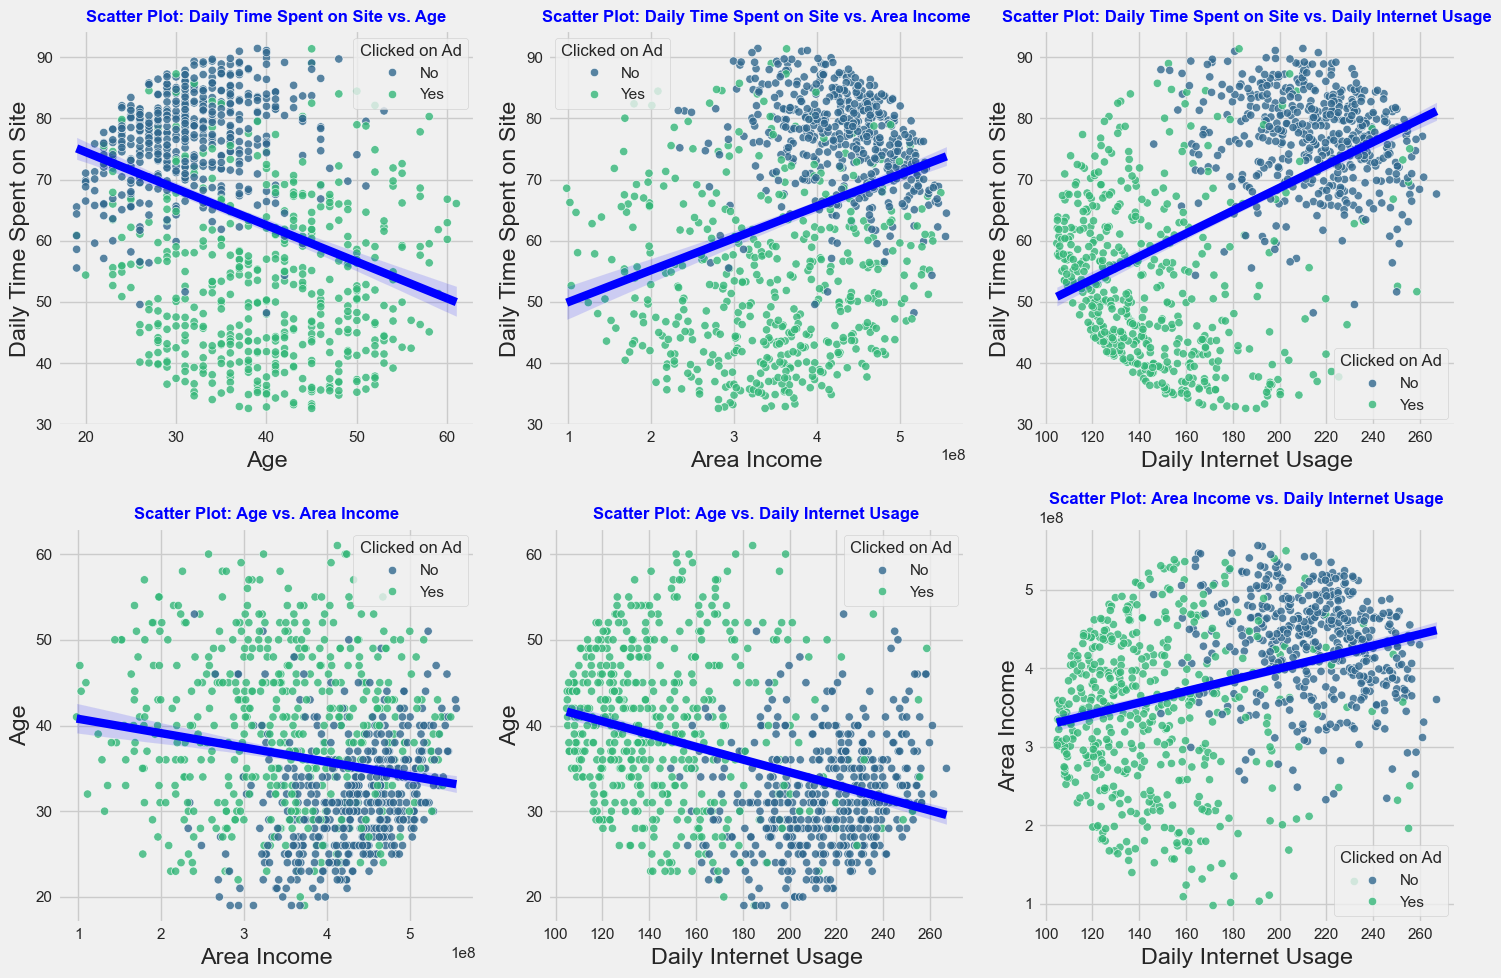

In [27]:
import itertools

# Mengatur ukuran gambar
plt.figure(figsize=(15, 10))

# Daftar fitur yang ingin dianalisis
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Menggambar scatter plot untuk setiap pasangan fitur
for i, (x_feature, y_feature) in enumerate(itertools.combinations(features, 2)):
    plt.subplot(2, 3, i + 1)

    # Membuat scatter plot dengan hue
    sns.scatterplot(data=df, x=y_feature, y=x_feature, hue='Clicked on Ad', palette='viridis', alpha=0.8)

    # Menambahkan garis regresi
    sns.regplot(data=df, x=y_feature, y=x_feature, scatter=False, color='blue')

    # Mengatur judul dengan parameter
    plt.title(f'Scatter Plot: {x_feature} vs. {y_feature}', fontsize=12, loc='center', fontweight='bold', color='blue')
    plt.ylabel(x_feature)  # Memastikan label y sesuai
    plt.xlabel(y_feature)  # Memastikan label x sesuai

plt.tight_layout()
plt.show()

## Multivariate Analysis

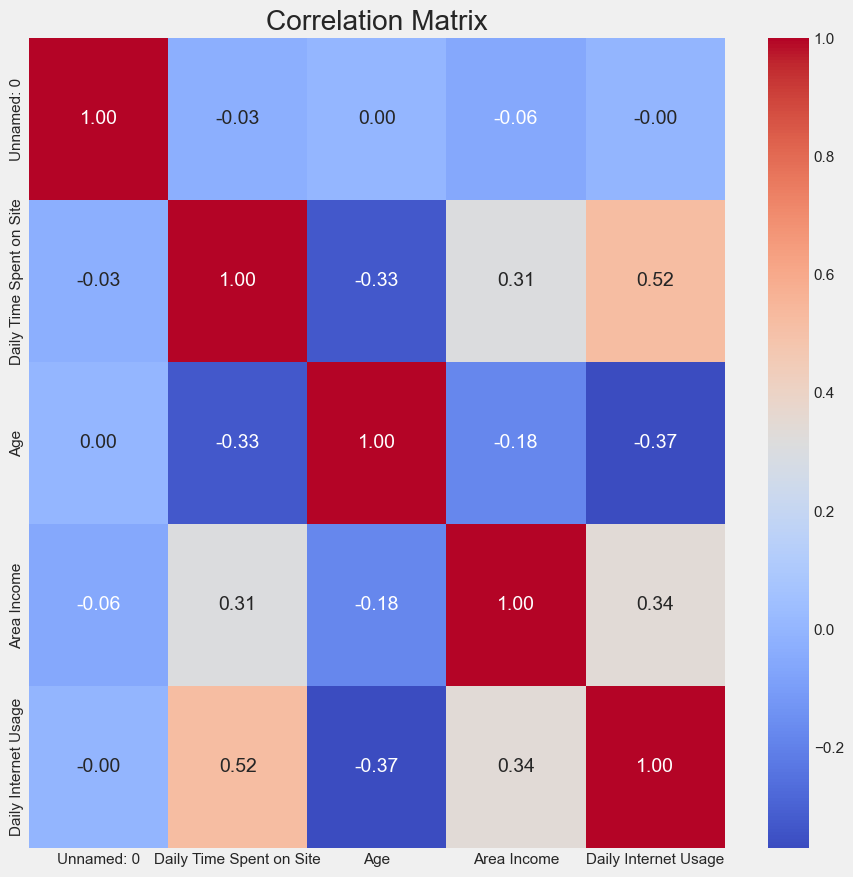

In [29]:
# Menghitung matriks korelasi
#correlation_matrix = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].corr()

# Menggunakan heatmap untuk visualisasi
plt.figure(figsize=(10, 10))
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [30]:
# Fungsi Cramér's V untuk dua kolom
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Membuat fungsi untuk menghitung matriks korelasi Cramér's V
def cramers_v_matrix(df, cols):
    # Membuat DataFrame kosong untuk menyimpan hasil korelasi
    matrix = pd.DataFrame(index=cols, columns=cols)
    
    # Menghitung Cramér's V untuk setiap pasangan kolom
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                matrix.loc[col1, col2] = 1.0  # Korelasi dengan dirinya sendiri adalah 1
            else:
                matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    
    return matrix.astype(float)

# Contoh daftar kolom kategorikal yang ingin dihitung korelasinya
cols = ['Male', 'Clicked on Ad', 'city', 'province', 'category']

# Menghitung matriks korelasi Cramér's V untuk kolom-kolom tersebut
correlation_matrix = cramers_v_matrix(df, cols)

# Menampilkan matriks korelasi
print(correlation_matrix)

                   Male  Clicked on Ad      city  province  category
Male           1.000000       0.033085  0.170422  0.123856  0.108222
Clicked on Ad  0.033085       1.000000  0.186941  0.126576  0.080252
city           0.170422       0.186941  1.000000  1.000000  0.172703
province       0.123856       0.126576  1.000000  1.000000  0.120150
category       0.108222       0.080252  0.172703  0.120150  1.000000


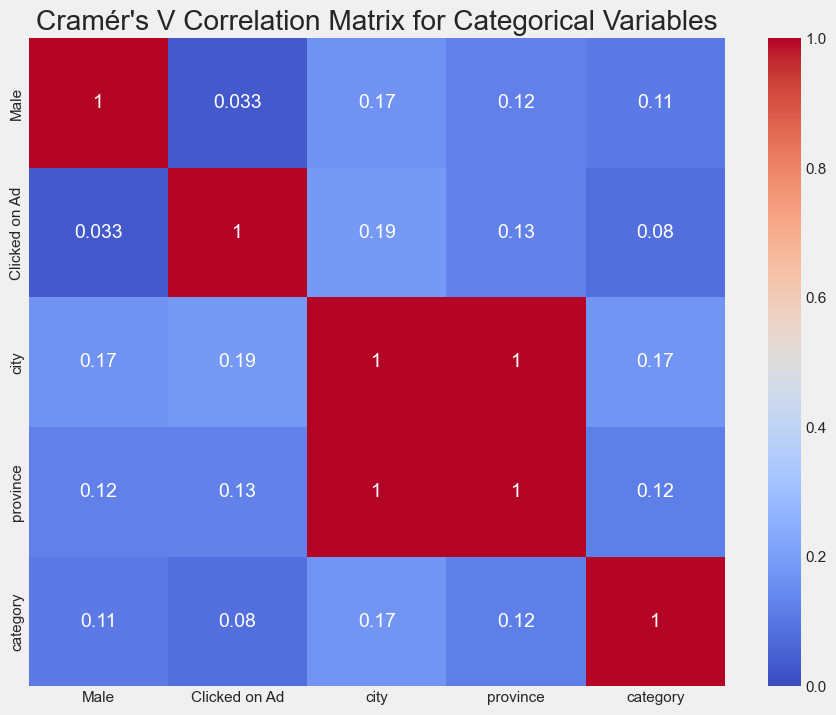

In [31]:
import matplotlib.pyplot as plt

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

# Data Cleaning & Preprocessing

### Handling Missing Value & Duplicate

In [34]:
df.isna().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

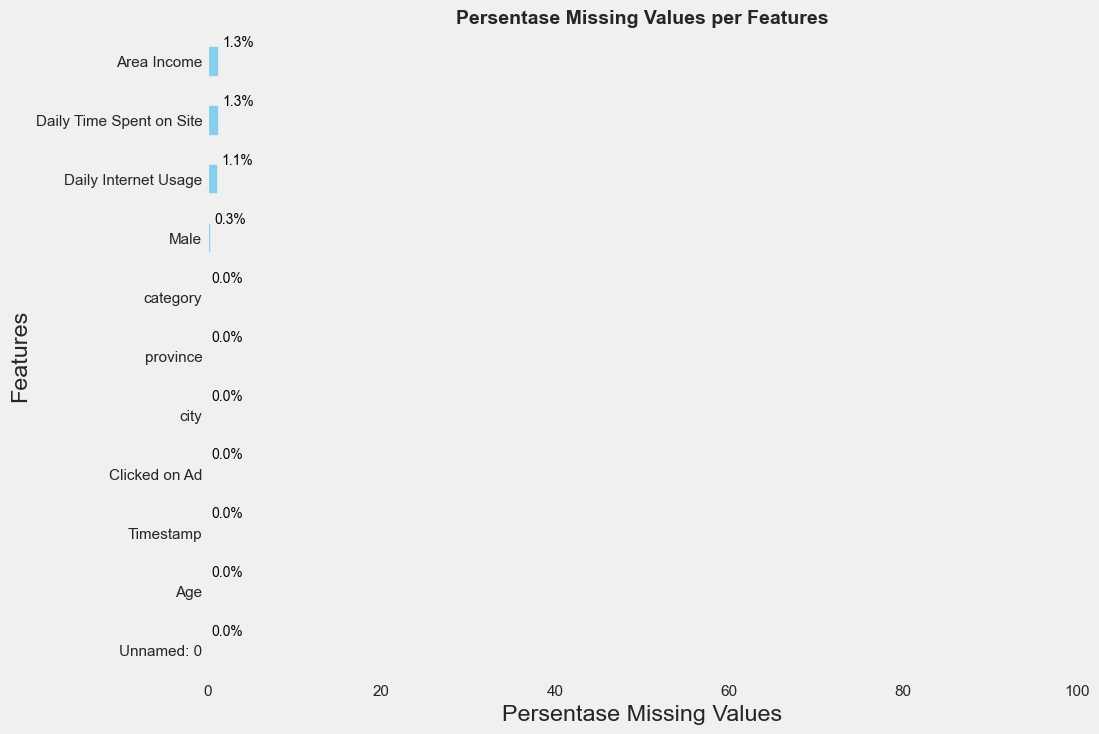

In [35]:
missing_percentage = df.isnull().sum() * 100 / len(df)

# Mengurutkan dari yang terbesar ke terkecil
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)

# Membuat bar chart horizontal
plt.figure(figsize=(10, 8))
ax = missing_percentage_sorted.plot(kind='barh', color='skyblue')

# Menghilangkan grid garis
ax.grid(False)

# Menambahkan skala dari 0 hingga 100 di sumbu-x
plt.xlim(0, 100)

# Menambahkan label persentase pada setiap bar
for i in ax.patches:
    plt.text(i.get_width() + 0.5, i.get_y() + 0.5, 
             str(round(i.get_width(), 2)) + '%', 
             fontsize=10, color='black')

# Memberikan judul dan label sumbu
plt.title('Persentase Missing Values per Features', fontsize=14,  fontweight='bold')
plt.xlabel('Persentase Missing Values')
plt.ylabel('Features')

plt.show()

Persentase Missing Value < 4% maka akan dilakukan drop 

In [37]:
df_clean = df.copy()

In [38]:
df_clean = df_clean[df_clean.notnull().all(axis=1)].reset_index(drop=True)

In [39]:
df_clean.drop_duplicates().head(3)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic


In [40]:
df_clean.duplicated().sum()

0

In [41]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                963 non-null    int64  
 1   Daily Time Spent on Site  963 non-null    float64
 2   Age                       963 non-null    int64  
 3   Area Income               963 non-null    float64
 4   Daily Internet Usage      963 non-null    float64
 5   Male                      963 non-null    object 
 6   Timestamp                 963 non-null    object 
 7   Clicked on Ad             963 non-null    object 
 8   city                      963 non-null    object 
 9   province                  963 non-null    object 
 10  category                  963 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 82.9+ KB


In [42]:
# Mengatur agar semua kolom dapat ditampilkan
pd.set_option('display.max_columns', None)

# Menampilkan jumlah missing values di setiap kolom
print(df_clean.isna().value_counts())

Unnamed: 0  Daily Time Spent on Site  Age    Area Income  Daily Internet Usage  Male   Timestamp  Clicked on Ad  city   province  category
False       False                     False  False        False                 False  False      False          False  False     False       963
Name: count, dtype: int64


In [43]:
df_clean.rename(columns={'Male':'Gender'}, inplace = True)

## Feature Extraction

### Ad Exposure Ratio

In [46]:
# Menghitung Ad Exposure Ratio
df_clean['ad_exposure_ratio'] = df_clean['Daily Time Spent on Site'] / df_clean['Daily Internet Usage']

# Membuat kategori berdasarkan Ad Exposure Ratio
bins = [0, 0.1, 0.3, 0.5, 1]  # Batasan kategori
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']  # Label kategori

df_clean['exposure_category'] = pd.cut(df_clean['ad_exposure_ratio'], bins=bins, labels=labels, right=False)


Hubungan antara Exposure Ratio, Daily Time Spent on Site, dan Daily Internet Usage:

- Daily Time Spent on Site:
Ini adalah jumlah waktu yang dihabiskan pengguna di situs web tertentu setiap hari.
Semakin tinggi Daily Time Spent on Site, semakin besar kemungkinan Ad Exposure Ratio juga meningkat, karena pengguna menghabiskan lebih banyak waktu di situs, memungkinkan lebih banyak paparan iklan.

- Daily Internet Usage:
Ini adalah total waktu pengguna menghabiskan untuk menggunakan internet secara keseluruhan dalam sehari.
Semakin tinggi Daily Internet Usage, Ad Exposure Ratio akan lebih kecil jika Daily Time Spent on Site tetap rendah. Sebaliknya, jika pengguna hanya menghabiskan sedikit waktu di situs dibandingkan dengan keseluruhan waktu internet, maka rasio paparan iklan akan menjadi lebih rendah.

Analisis Hubungan:
- High Daily Time Spent on Site & Low Daily Internet Usage: Jika seorang pengguna menghabiskan banyak waktu di situs tetapi tidak banyak menggunakan internet untuk aktivitas lain, Exposure Ratio akan tinggi. Ini berarti pengguna sangat terfokus pada situs tersebut dan berpotensi lebih sering melihat iklan.

- Low Daily Time Spent on Site & High Daily Internet Usage: Jika pengguna menghabiskan sedikit waktu di situs tetapi banyak waktu di internet, Exposure Ratio akan rendah. Ini menunjukkan bahwa situs tersebut hanya menyumbang sebagian kecil dari aktivitas internet pengguna, sehingga paparan iklannya lebih rendah.

- Balanced Daily Time Spent on Site & Daily Internet Usage: Jika waktu di situs dan penggunaan internet total seimbang, rasio paparan akan berada di tingkat menengah, yang mungkin menunjukkan pola pengguna internet reguler yang secara proporsional menghabiskan waktu di situs dan melakukan aktivitas internet lainnya.

Insight yang Bisa Diambil:
- Exposure Ratio yang tinggi dapat mengindikasikan bahwa pengguna lebih banyak terpapar iklan di situs tersebut, sehingga mereka mungkin lebih rentan terhadap iklan yang lebih agresif. Namun, jika paparan iklan terlalu tinggi, bisa menyebabkan kelelahan iklan.
- Pengguna dengan Exposure Ratio rendah cenderung kurang terpengaruh oleh iklan di situs tersebut, dan mungkin memerlukan strategi periklanan yang berbeda, seperti iklan yang lebih ditargetkan atau lebih personal.

### Extract Data Date

In [49]:
# Pastikan kolom 'Timestamp' dalam format datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Ekstraksi fitur-fitur waktu
df_clean['Year'] = df_clean['Timestamp'].dt.year        # Ekstrak Tahun
df_clean['Month'] = df_clean['Timestamp'].dt.month      # Ekstrak Bulan
df_clean['Week'] = df_clean['Timestamp'].dt.isocalendar().week  # Ekstrak Pekan ISO
df_clean['Day'] = df_clean['Timestamp'].dt.day          # Ekstrak Hari
df_clean['Hour'] = df_clean['Timestamp'].dt.hour        # Ekstrak Jam

# Lihat DataFrame hasilnya
print(df_clean[['Year', 'Month', 'Week', 'Day', 'Hour']].head())

   Year  Month  Week  Day  Hour
0  2016      3    12   27     0
1  2016      4    14    4     1
2  2016      3    10   13    20
3  2016      1     1   10     2
4  2016      6    22    3     3


In [50]:
df_clean.drop(columns=['Unnamed: 0', 'Timestamp'], inplace=True)

### Extract Age 

  age_category  count
0          <18      0
1        18-30    254
2        31-45    527
3        46-60    178
4          60+      4


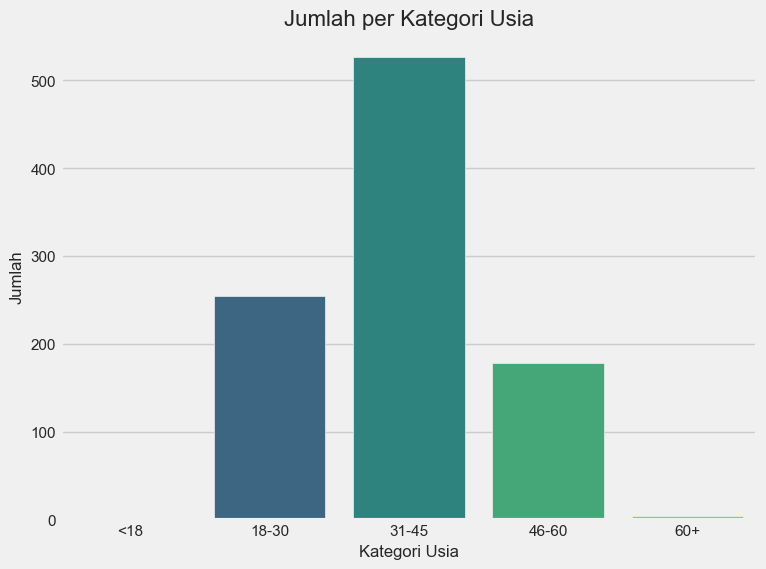

In [52]:
# Membuat kategori usia
bins = [0, 18, 30, 45, 60, 100]  # Batasan kategori usia
labels = ['<18', '18-30', '31-45', '46-60', '60+']  # Label kategori

# Menambahkan kolom 'age_category' berdasarkan rentang usia
df_clean['age_category'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

# Mengelompokkan data berdasarkan kategori usia dan menghitung jumlah dalam setiap kategori
age_group = df_clean.groupby('age_category').size().reset_index(name='count')

# Menampilkan hasil grup by kategori usia
print(age_group)

# Membuat visualisasi jumlah per kategori usia dalam bentuk grafik batang
plt.figure(figsize=(8, 6))
sns.barplot(x='age_category', y='count', data=age_group, palette='viridis')

# Menambahkan judul dan label
plt.title('Jumlah per Kategori Usia', fontsize=16)
plt.xlabel('Kategori Usia', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Menampilkan grafik
plt.show()

   age_category    category  count
0          0-18        Bank      0
1          0-18  Electronic      0
2          0-18     Fashion      0
3          0-18     Finance      0
4          0-18        Food      0
5          0-18   Furniture      0
6          0-18      Health      0
7          0-18       House      0
8          0-18    Otomotif      0
9          0-18      Travel      0
10        19-30        Bank     21
11        19-30  Electronic     23
12        19-30     Fashion     23
13        19-30     Finance     28
14        19-30        Food     28
15        19-30   Furniture     25
16        19-30      Health     34
17        19-30       House     26
18        19-30    Otomotif     26
19        19-30      Travel     20
20        31-50        Bank     64
21        31-50  Electronic     59
22        31-50     Fashion     61
23        31-50     Finance     51
24        31-50        Food     61
25        31-50   Furniture     61
26        31-50      Health     62
27        31-50     

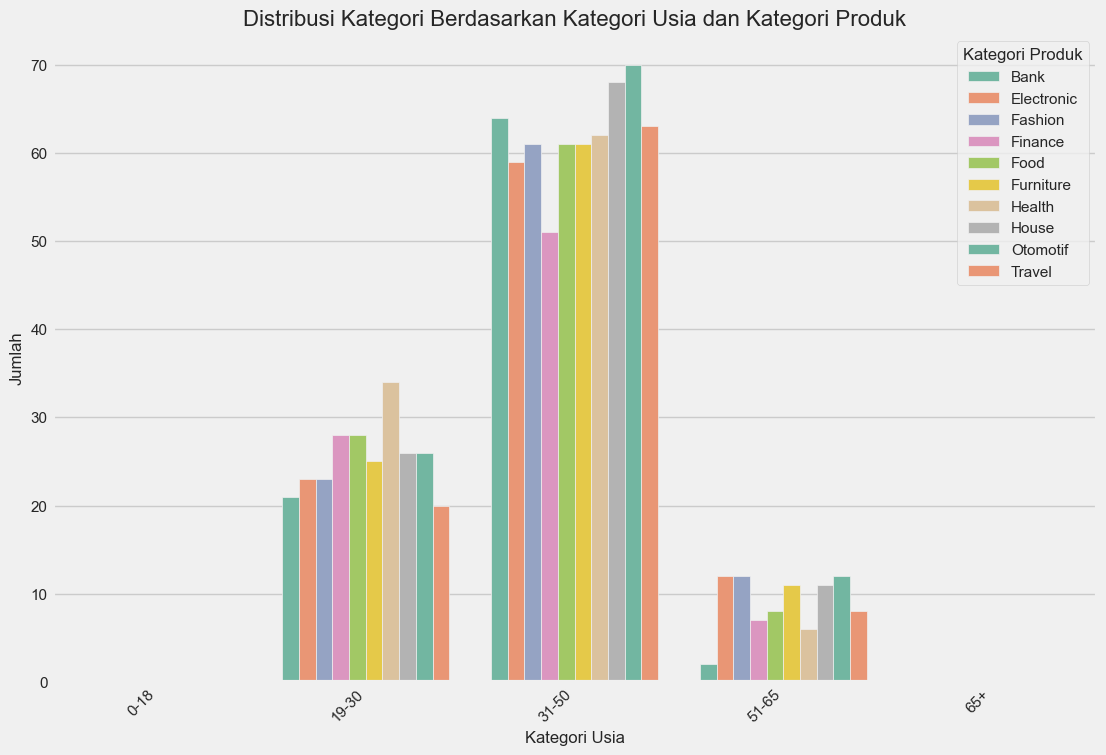

In [53]:
bins_age = [0, 18, 30, 50, 65, 100]  # Rentang usia
labels_age = ['0-18', '19-30', '31-50', '51-65', '65+']  # Label usia

# Menambahkan kategori umur ke dalam kolom baru 'age_category'
df_clean['age_category'] = pd.cut(df_clean['Age'], bins=bins_age, labels=labels_age, right=False)

# Mengelompokkan data berdasarkan 'age_category' dan 'category', lalu menghitung jumlahnya
grouped_category_age = df_clean.groupby(['age_category', 'category']).size().reset_index(name='count')

# Menampilkan hasil pengelompokan
print(grouped_category_age)

# Membuat visualisasi dalam bentuk grafik batang
plt.figure(figsize=(12, 8))
sns.barplot(x='age_category', y='count', hue='category', data=grouped_category_age, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Kategori Berdasarkan Kategori Usia dan Kategori Produk', fontsize=16)
plt.xlabel('Kategori Usia', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x jika diperlukan

# Menampilkan grafik
plt.legend(title='Kategori Produk')
plt.show()

### Feature Encoding

In [55]:
one_hot = ['Clicked on Ad', 'city', 'province', 'category']

df_clean = pd.get_dummies(df_clean, columns=one_hot, drop_first=True)

df_clean['Gender'] = df_clean['Gender'].replace({'Perempuan':0, 'Laki-Laki':1})

# Mengganti nilai False dengan 0 di DataFrame yang telah diubah
df_clean.replace({False: 0, True: 1}, inplace=True)

# Label encoding untuk TingkatPendidikan
label_encoder = LabelEncoder()
df_clean['exposure_category'] = label_encoder.fit_transform(df_clean['exposure_category'])

In [56]:
df_clean.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,ad_exposure_ratio,exposure_category,Year,Month,Week,Day,Hour,age_category,Clicked on Ad_Yes,city_Bandar Lampung,city_Bandung,city_Banjarmasin,city_Batam,city_Bekasi,city_Bogor,city_Cimahi,city_Denpasar,city_Depok,city_Jakarta Barat,city_Jakarta Pusat,city_Jakarta Selatan,city_Jakarta Timur,city_Jakarta Utara,city_Makassar,city_Malang,city_Medan,city_Padang,city_Pakanbaru,city_Palembang,city_Pontianak,city_Samarinda,city_Semarang,city_Serang,city_Surabaya,city_Surakarta,city_Tangerang,city_Tangerang Selatan,city_Tasikmalaya,province_Banten,province_Daerah Khusus Ibukota Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
666,87.16,33,425641510.0,197.15,0,0.442100,2,2016,2,6,11,11,31-50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
194,76.90,28,462754880.0,212.67,0,0.361593,2,2016,4,16,22,8,19-30,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
90,39.94,41,454490330.0,156.30,0,0.255534,1,2016,1,1,8,22,31-50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
473,50.19,40,237910890.0,117.30,0,0.427877,2,2016,3,12,25,19,31-50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
406,53.38,35,425623590.0,120.06,1,0.444611,2,2016,3,13,30,1,31-50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


# Feature Selection

In [58]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming df_clean is your DataFrame containing the required columns
x = df_clean[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'ad_exposure_ratio',
             'Month', 'Week', 'Day', 'Hour']]
Y = df_clean['Clicked on Ad_Yes']  # Y should be a 1D array for classification

# Compute ANOVA F-value and p-values
f_scores, p_values = f_classif(x, Y)

# Create a DataFrame to display results
results = pd.DataFrame({'Feature': x.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the results by F-score in descending order
results_sorted_by_fscore = results.sort_values(by='F-Score', ascending=False)

# Print the sorted table
print(results_sorted_by_fscore)

                    Feature      F-Score        P-Value
3      Daily Internet Usage  1622.386509  1.421685e-208
0  Daily Time Spent on Site  1193.277521  1.217666e-170
1                       Age   306.818735   7.884454e-60
2               Area Income   279.428391   2.950975e-55
4         ad_exposure_ratio     9.800243   1.797582e-03
8                      Hour     3.204480   7.375159e-02
6                      Week     0.392130   5.313304e-01
5                     Month     0.073536   7.863147e-01
7                       Day     0.059726   8.069813e-01


In [59]:
import pandas as pd
from sklearn.feature_selection import f_classif

# Assuming df_clean is your DataFrame containing the required columns
x = df_clean[['Gender', 'exposure_category', 'city_Bandar Lampung',	'city_Bandung',	
              'city_Banjarmasin', 'city_Batam',	'city_Bekasi',	'city_Bogor', 'city_Cimahi', 'city_Denpasar',
              'city_Depok',	'city_Jakarta Barat', 'city_Jakarta Pusat',	'city_Jakarta Selatan',	'city_Jakarta Timur',
              'city_Jakarta Utara',	'city_Makassar', 'city_Malang',	'city_Medan', 'city_Padang', 'city_Pakanbaru',
              'city_Palembang',	'city_Pontianak', 'city_Samarinda', 'city_Semarang', 'city_Serang',	'city_Surabaya',
              'city_Surakarta',	'city_Tangerang',	'city_Tangerang Selatan', 'city_Tasikmalaya', 'province_Banten',
              'province_Daerah Khusus Ibukota Jakarta',	'province_Jawa Barat', 'province_Jawa Tengah',	'province_Jawa Timur', 
              'province_Kalimantan Barat', 'province_Kalimantan Selatan', 'province_Kalimantan Timur', 'province_Kepulauan Riau', 
              'province_Lampung', 'province_Riau', 'province_Sulawesi Selatan',	'province_Sumatra Barat', 'province_Sumatra Selatan',
              'province_Sumatra Utara',	'category_Electronic', 'category_Fashion', 'category_Finance', 'category_Food', 'category_Furniture',
              'category_Health', 'category_House',	'category_Otomotif', 'category_Travel']]
Y = df_clean['Clicked on Ad_Yes']  # Y should be a 1D array for classification

# Compute ANOVA F-value and p-values
f_scores, p_values = f_classif(x, Y)

# Create a DataFrame to display results
results = pd.DataFrame({'Feature': x.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the results by F-score in descending order
results_sorted_by_fscore = results.sort_values(by='F-Score', ascending=False)

# Print the sorted table
print(results_sorted_by_fscore)

                                   Feature     F-Score       P-Value
1                        exposure_category  167.989491  1.594842e-35
38               province_Kalimantan Timur    5.520839  1.899279e-02
12                      city_Jakarta Pusat    5.151609  2.344567e-02
25                             city_Serang    4.414939  3.588548e-02
17                             city_Malang    4.112924  4.283218e-02
8                              city_Cimahi    3.958416  4.692065e-02
31                         province_Banten    3.505346  6.147456e-02
33                     province_Jawa Barat    3.430608  6.430503e-02
32  province_Daerah Khusus Ibukota Jakarta    3.106132  7.831586e-02
29                  city_Tangerang Selatan    3.087430  7.921776e-02
48                        category_Finance    2.284856  1.309710e-01
23                          city_Samarinda    1.767349  1.840260e-01
0                                   Gender    1.723021  1.896180e-01
37             province_Kalimantan

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 67 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Daily Time Spent on Site                963 non-null    float64 
 1   Age                                     963 non-null    int64   
 2   Area Income                             963 non-null    float64 
 3   Daily Internet Usage                    963 non-null    float64 
 4   Gender                                  963 non-null    int64   
 5   ad_exposure_ratio                       963 non-null    float64 
 6   exposure_category                       963 non-null    int32   
 7   Year                                    963 non-null    int32   
 8   Month                                   963 non-null    int32   
 9   Week                                    963 non-null    UInt32  
 10  Day                                     963 non-nu

## Split Data

In [62]:
from sklearn.model_selection import train_test_split

# Misalkan df_clean adalah DataFrame kamu, dan 'target' adalah kolom target yang ingin diprediksi
X = df_clean[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'ad_exposure_ratio', 'exposure_category', 'Week', 'Month', 'Day', 'Hour']]# Fitur (selain kolom target)
y = df_clean['Clicked on Ad_Yes']  # Kolom target

X1 = X.copy()
y1 = y.copy()
X2 = X.copy()
y2 = y.copy()

# Membagi data menjadi 80% training dan 20% testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y)
X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y2, test_size=0.2, random_state=42, stratify=y)

print(f'Train set size: {X1_train.shape[0]}')
print(f'Test set size: {X1_test.shape[0]}')

Train set size: 770
Test set size: 193


1. X1 dan y1 : Data tanpa normalisasi/standarisasi
2. X2 dan y2 : data dengan normalisasi dan standarisasi

train-test split data menggunakan ratio 80:20. 

In [64]:
df_clean['Clicked on Ad_Yes'].value_counts()

Clicked on Ad_Yes
1    485
0    478
Name: count, dtype: int64

# Feature Scaling

In [66]:
# Scaling data with robust scaler
from sklearn.preprocessing import StandardScaler

nums = X2_train.select_dtypes(include=['float64', 'int64', 'int32', 'UInt32']).columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data training
X2_train_scaled = X2_train.copy()

for n in nums :
    scaler = scaler.fit(X2_train_scaled[[n]])
    X2_train_scaled[n] = scaler.fit_transform(X2_train_scaled[[n]])
    X2_test[n] = scaler.transform(X2_test[[n]])



In [67]:
X2_train_scaled[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,770.0,-2.168540e-16,1.00065,-2.041100,-0.900264,0.203318,0.850849,1.673603
Age,770.0,2.491513e-16,1.00065,-1.918193,-0.794736,-0.120662,0.665757,2.800325
Area Income,770.0,9.112480e-17,1.00065,-3.059120,-0.591949,0.139241,0.777666,1.809151
Daily Internet Usage,770.0,2.929835e-16,1.00065,-1.733877,-0.945368,0.077627,0.876098,2.002918
ad_exposure_ratio,770.0,3.045183e-16,1.00065,-2.097633,-0.665463,-0.132424,0.595163,3.023587
exposure_category,770.0,-4.613914e-18,1.00065,-2.237557,-0.795784,0.645989,0.645989,0.645989
Week,770.0,2.768348e-17,1.00065,-1.497127,-0.779964,-0.062802,0.654361,3.830367
Month,770.0,-8.420393e-17,1.00065,-1.478466,-0.961473,0.072513,0.589507,1.623493
Day,770.0,-5.767392e-18,1.00065,-1.639180,-0.837876,-0.036572,0.879204,1.794980
Hour,770.0,8.881784e-17,1.00065,-1.692447,-0.828553,0.035341,0.899235,1.619147


# Data Modeling

## Function

In [70]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import time
def eval_classification1(model):
    y_pred = model.predict(X1_test)
    y_pred_train = model.predict(X1_train)
    y_pred_proba = model.predict_proba(X1_test)
    y_pred_proba_train = model.predict_proba(X1_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y1_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y1_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y1_test, y_pred, zero_division=0))
    print("Precision (Train Set): %.2f" % precision_score(y1_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y1_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y1_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y1_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y1_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y1_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y1_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe1(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1={}
    fit_time1 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X1_train, y1_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))
        #Append model
        fitted_models1[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models1, fit_time1





def confusion1(model):
    # Prediksi model
    y_pred_proba = model.predict_proba(X1_test)
    y_predict = model.predict(X1_test)
    
    # Evaluasi performa model
    print('Accuracy: %.2f%%' % (accuracy_score(y1_test, y_predict) * 100))
    print('Precision(FP): %.2f%%' % (precision_score(y1_test, y_predict, zero_division=0) * 100))
    print('Recall(FN): %.2f%%' % (recall_score(y1_test, y_predict) * 100))
    print('F1_Score(FP&FN): %.2f%%' % (f1_score(y1_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y1_test, y_pred_proba[:,1]) * 100))
    
    # Confusion Matrix
    cm = confusion_matrix(y1_test, y_predict)
    
    # Ekstrak nilai TP, FP, TN, FN dari confusion matrix
    TN, FP, FN, TP = cm.ravel()
    
    # Tampilkan nilai-nilai TP, FP, TN, FN
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
    
    # Visualisasi confusion matrix menggunakan heatmap
    plt.figure(figsize=(6,4))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')  # Menggunakan cmap untuk memperindah
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    
    plt.show()

Dalam konteks klasifikasi pelanggan yang mengklik iklan, jika tujuanmu adalah memaksimalkan jumlah pelanggan yang benar-benar mengklik iklan yang terprediksi dengan benar,

# A. Without Normalization

## Logistic Regression

Accuracy (Test Set): 0.50
Accuracy (Train Set): 0.50
Precision (Test Set): 0.00
Precision (Train Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.76
Accuracy (crossval train): 0.4961038961038961
Accuracy (crossval test): 0.49610389610389605
Accuracy: 49.74%
Precision(FP): 0.00%
Recall(FN): 0.00%
F1_Score(FP&FN): 0.00%
ROC_AUC: 80.03%
True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 96
False Negatives (FN): 97


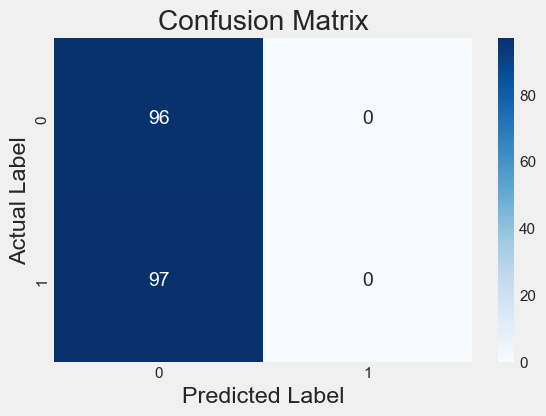

In [74]:
from sklearn.linear_model import LogisticRegression 

# Train logistic regression model
logreg1 = LogisticRegression(random_state=42)
logreg1.fit(X1_train, y1_train)

# Evaluate model
eval_classification1(logreg1)

# Confusion matrix
confusion1(logreg1)

## Decision Tree

Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
Recall (Test Set): 0.99
Recall (Train Set): 1.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9281385281385283
Accuracy: 97.93%
Precision(FP): 96.97%
Recall(FN): 98.97%
F1_Score(FP&FN): 97.96%
ROC_AUC: 97.92%
True Positives (TP): 96
False Positives (FP): 3
True Negatives (TN): 93
False Negatives (FN): 1


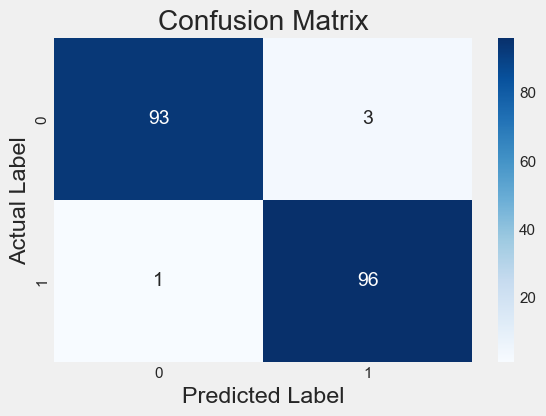

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(random_state = 42)
dt1.fit(X1_train, y1_train)

eval_classification1(dt1)

# Confusion matrix

confusion1(dt1)

## Random Forest

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9580086580086581
Accuracy: 97.41%
Precision(FP): 95.10%
Recall(FN): 100.00%
F1_Score(FP&FN): 97.49%
ROC_AUC: 99.88%
True Positives (TP): 97
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 0


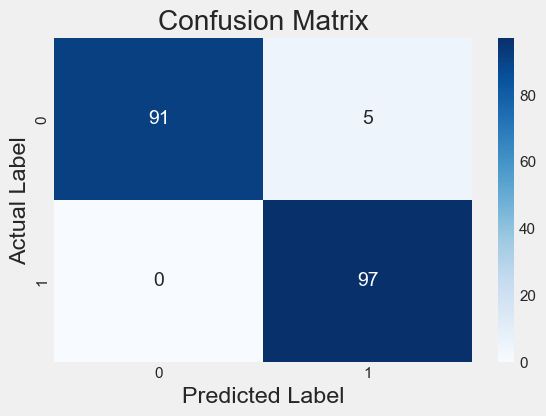

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X1_train, y1_train)

eval_classification1(rf1)

confusion1(rf1)

## KNN

Accuracy (Test Set): 0.69
Accuracy (Train Set): 0.76
Precision (Test Set): 0.69
Precision (Train Set): 0.77
Recall (Test Set): 0.70
Recall (Train Set): 0.75
F1-Score (Test Set): 0.70
F1-Score (Train Set): 0.76
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0.84
Accuracy (crossval train): 0.7537878787878789
Accuracy (crossval test): 0.6532467532467532
Accuracy: 69.43%
Precision(FP): 69.39%
Recall(FN): 70.10%
F1_Score(FP&FN): 69.74%
ROC_AUC: 78.06%
True Positives (TP): 68
False Positives (FP): 30
True Negatives (TN): 66
False Negatives (FN): 29


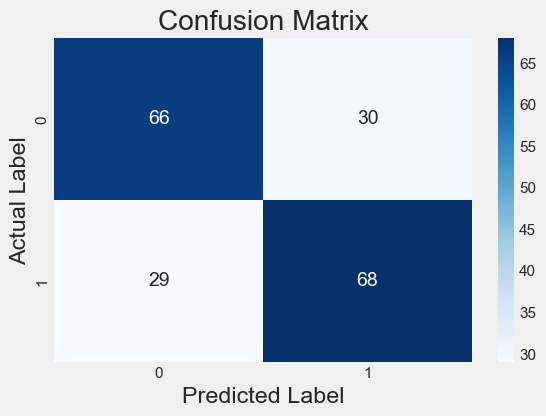

In [80]:

from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)

eval_classification1(knn1)

confusion1(knn1)

## Gradient Boosting

Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 0.96
Precision (Train Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9993506493506493
Accuracy (crossval test): 0.9441558441558442
Accuracy: 97.93%
Precision(FP): 96.04%
Recall(FN): 100.00%
F1_Score(FP&FN): 97.98%
ROC_AUC: 99.87%
True Positives (TP): 97
False Positives (FP): 4
True Negatives (TN): 92
False Negatives (FN): 0


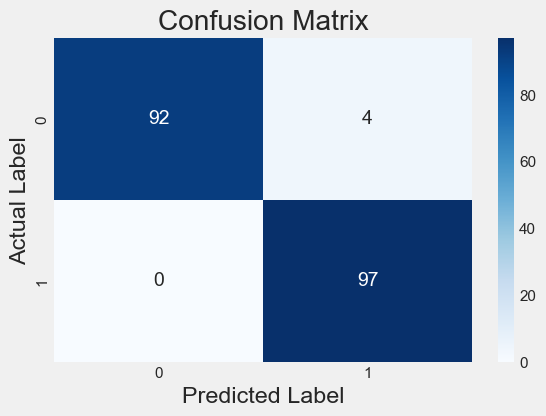

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gb1 = GradientBoostingClassifier(random_state=123)
gb1.fit(X1_train, y1_train)

eval_classification1(gb1)

confusion1(gb1)

## XGBoost

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 0.95
Precision (Train Set): 1.00
Recall (Test Set): 0.99
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9463203463203465
Accuracy: 96.89%
Precision(FP): 95.05%
Recall(FN): 98.97%
F1_Score(FP&FN): 96.97%
ROC_AUC: 99.82%
True Positives (TP): 96
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 1


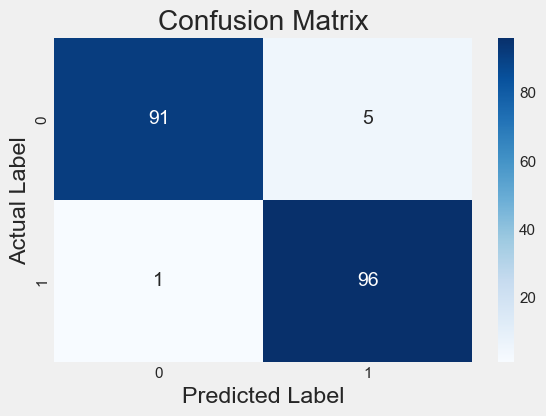

In [84]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(nthread=6, tree_method='hist', random_state=123)

xgb1.fit(X1_train, y1_train)

eval_classification1(xgb1)

confusion1(xgb1)

# Hyperparameter Tuning

In [86]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression1': Pipeline([('clf', LogisticRegression(random_state=123))]),
            'decisiontree1':Pipeline([('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest1':Pipeline([('clf', RandomForestClassifier(random_state = 123))]),
            'knn1':Pipeline([('clf', KNeighborsClassifier())]),
            'gb1':Pipeline([('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost1': Pipeline([('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr1 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt1 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf1 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn1 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb1 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb1 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression1':hyperparameters_lr1,
                   'decisiontree1':hyperparameters_dt1,
                   'randomforest1':hyperparameters_rf1,
                   'knn1':hyperparameters_knn1,
                   'gb1':hyperparameters_gb1,
                   'xgboost1': hyperparameters_xgb1}

In [87]:
fitted_models1, fit_time1 = grid_pipe1(pipelines,hyperparameters,scoring='accuracy')

Fitting 15 folds for each of 400 candidates, totalling 6000 fits
The logisticregression1 model has been fitted.
Total Fit Time: 82.161s
Best accuracy: 0.942
Best params:
 {'clf__C': 1.0, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree1 model has been fitted.
Total Fit Time: 44.330s
Best accuracy: 0.918
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 26, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest1 model has been fitted.
Total Fit Time: 64.768s
Best accuracy: 0.949
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.2, 'clf__n_estimators': 120} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn1 model has been fitted.
Total Fit Time: 96.937s
Best ac

# After Hyperparameter Tuning

## Logistic Regression

Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.95
Precision (Test Set): 0.98
Precision (Train Set): 0.98
Recall (Test Set): 0.99
Recall (Train Set): 0.93
F1-Score (Test Set): 0.98
F1-Score (Train Set): 0.95
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9183982683982682
Accuracy (crossval test): 0.9151515151515153
Accuracy: 98.45%
Precision(FP): 97.96%
Recall(FN): 98.97%
F1_Score(FP&FN): 98.46%
ROC_AUC: 99.90%
True Positives (TP): 96
False Positives (FP): 2
True Negatives (TN): 94
False Negatives (FN): 1


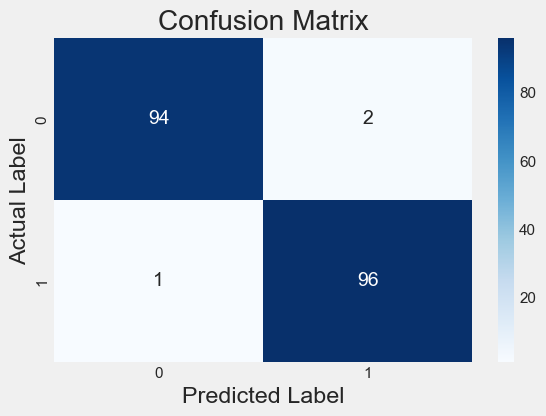

In [90]:
logreg1_tuned = LogisticRegression(random_state=42, C = 1.0, penalty = 'l2', solver = 'newton-cg')
logreg1_tuned.fit(X1_train, y1_train)

eval_classification1(logreg1_tuned)

confusion1(logreg1_tuned)

## Decision Tree

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.94
Precision (Test Set): 0.90
Precision (Train Set): 0.93
Recall (Test Set): 0.93
Recall (Train Set): 0.95
F1-Score (Test Set): 0.91
F1-Score (Train Set): 0.94
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9524891774891775
Accuracy (crossval test): 0.9160173160173158
Accuracy: 91.19%
Precision(FP): 90.00%
Recall(FN): 92.78%
F1_Score(FP&FN): 91.37%
ROC_AUC: 98.34%
True Positives (TP): 90
False Positives (FP): 10
True Negatives (TN): 86
False Negatives (FN): 7


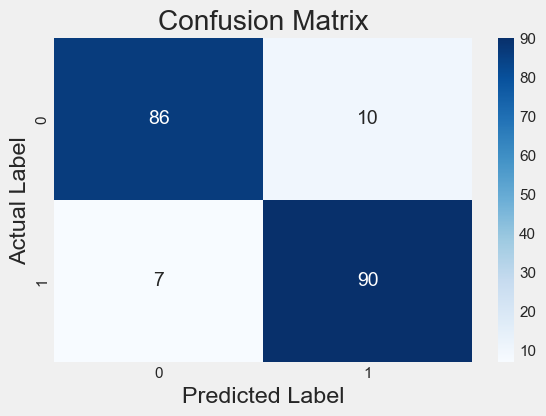

In [92]:

dt1_tuned = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 26, splitter = 'best')
dt1_tuned.fit(X1_train, y1_train)

eval_classification1(dt1_tuned)

confusion1(dt1_tuned)

## Random Forest

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.95
Precision (Test Set): 0.92
Precision (Train Set): 0.96
Recall (Test Set): 0.99
Recall (Train Set): 0.94
F1-Score (Test Set): 0.96
F1-Score (Train Set): 0.95
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9518398268398267
Accuracy (crossval test): 0.9493506493506493
Accuracy: 95.34%
Precision(FP): 92.31%
Recall(FN): 98.97%
F1_Score(FP&FN): 95.52%
ROC_AUC: 99.58%
True Positives (TP): 96
False Positives (FP): 8
True Negatives (TN): 88
False Negatives (FN): 1


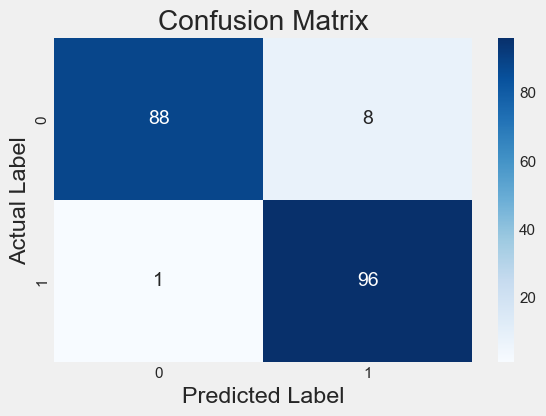

In [94]:
rf1_tuned = RandomForestClassifier(random_state=42, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.2, n_estimators = 120)
rf1_tuned.fit(X1_train, y1_train)

eval_classification1(rf1_tuned)

confusion1(rf1_tuned)

## K-Nearest Neighbours

Accuracy (Test Set): 0.71
Accuracy (Train Set): 0.72
Precision (Test Set): 0.75
Precision (Train Set): 0.78
Recall (Test Set): 0.63
Recall (Train Set): 0.62
F1-Score (Test Set): 0.69
F1-Score (Train Set): 0.69
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0.77
Accuracy (crossval train): 0.7158008658008659
Accuracy (crossval test): 0.7056277056277056
Accuracy: 70.98%
Precision(FP): 75.31%
Recall(FN): 62.89%
F1_Score(FP&FN): 68.54%
ROC_AUC: 78.48%
True Positives (TP): 61
False Positives (FP): 20
True Negatives (TN): 76
False Negatives (FN): 36


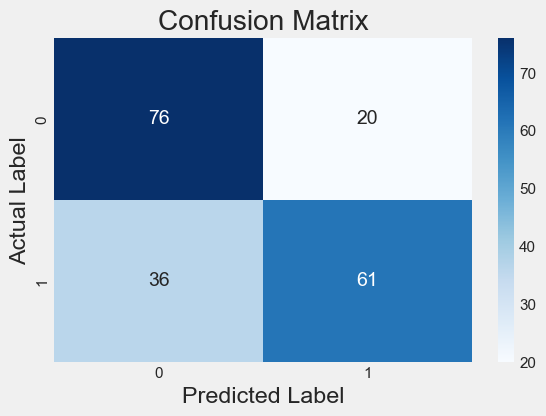

In [96]:
knn1_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 28, p = 1, weights = 'uniform')
knn1_tuned.fit(X1_train, y1_train)

eval_classification1(knn1_tuned)

confusion1(knn1_tuned)

## Gradient Boosting

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.98
Precision (Test Set): 0.94
Precision (Train Set): 0.99
Recall (Test Set): 0.99
Recall (Train Set): 0.97
F1-Score (Test Set): 0.96
F1-Score (Train Set): 0.98
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.9856060606060606
Accuracy (crossval test): 0.9554112554112554
Accuracy: 96.37%
Precision(FP): 94.12%
Recall(FN): 98.97%
F1_Score(FP&FN): 96.48%
ROC_AUC: 99.82%
True Positives (TP): 96
False Positives (FP): 6
True Negatives (TN): 90
False Negatives (FN): 1


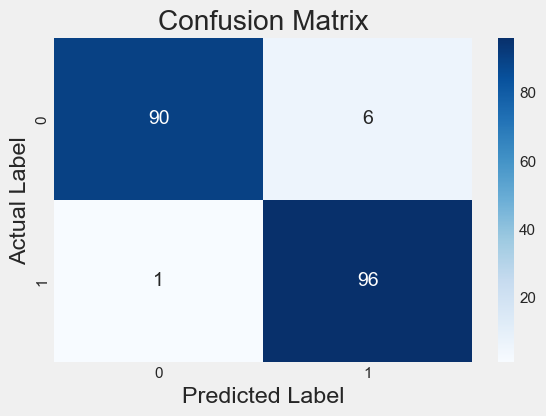

In [98]:
gb1_tuned = GradientBoostingClassifier(random_state=42, criterion = 'friedman_mse', loss = 'exponential',
                                       max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
gb1_tuned.fit(X1_train, y1_train)

eval_classification1(gb1_tuned)

confusion1(gb1_tuned)

## XGBoost

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.98
Precision (Test Set): 0.95
Precision (Train Set): 0.99
Recall (Test Set): 0.99
Recall (Train Set): 0.96
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.98
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
Accuracy (crossval train): 0.976839826839827
Accuracy (crossval test): 0.9554112554112554
Accuracy: 96.89%
Precision(FP): 95.05%
Recall(FN): 98.97%
F1_Score(FP&FN): 96.97%
ROC_AUC: 99.84%
True Positives (TP): 96
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 1


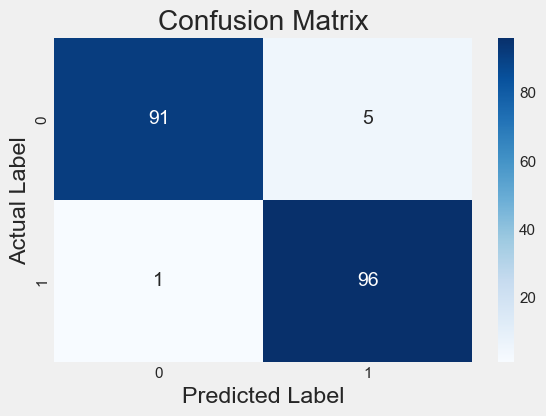

In [100]:
xgb1_tuned = XGBClassifier(nthread=6, tree_method='hist', random_state=123, eta = 0.2578947368421053, max_depth = 1)

xgb1_tuned.fit(X1_train, y1_train)

eval_classification1(xgb1_tuned)

confusion1(xgb1_tuned)

# B. With Normalization

In [102]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
import time

def eval_classification2(model):
    y_pred = model.predict(X2_test)
    y_pred_train = model.predict(X2_train)
    y_pred_proba = model.predict_proba(X2_test)
    y_pred_proba_train = model.predict_proba(X2_train)
    
    model1 = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', model)
    ])

    print("Accuracy (Test Set): %.2f" % accuracy_score(y2_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y2_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y2_test, y_pred, zero_division=0))
    print("Precision (Train Set): %.2f" % precision_score(y2_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y2_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y2_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y2_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y2_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y2_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y2_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model, X=X1_train, y=y1_train, cv=cv, scoring='accuracy', return_train_score=True)
    print('Accuracy (crossval train): '+ str(score['train_score'].mean()))
    print('Accuracy (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe2(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models2={}
    fit_time2 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X2_train, y2_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))
        #Append model
        fitted_models2[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models2, fit_time2





def confusion2(model):
    # Prediksi model
    y_pred_proba = model.predict_proba(X2_test)
    y_predict = model.predict(X2_test)
    
    # Evaluasi performa model
    print('Accuracy: %.2f%%' % (accuracy_score(y2_test, y_predict) * 100))
    print('Precision(FP): %.2f%%' % (precision_score(y2_test, y_predict, zero_division=0) * 100))
    print('Recall(FN): %.2f%%' % (recall_score(y2_test, y_predict) * 100))
    print('F1_Score(FP&FN): %.2f%%' % (f1_score(y2_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y2_test, y_pred_proba[:,1]) * 100))
    
    # Confusion Matrix
    cm = confusion_matrix(y2_test, y_predict)
    
    # Ekstrak nilai TP, FP, TN, FN dari confusion matrix
    TN, FP, FN, TP = cm.ravel()
    
    # Tampilkan nilai-nilai TP, FP, TN, FN
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")
    
    # Visualisasi confusion matrix menggunakan heatmap
    plt.figure(figsize=(6,4))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')  # Menggunakan cmap untuk memperindah
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    
    plt.show()

## Logistic Regression

Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.50
Precision (Test Set): 0.97
Precision (Train Set): 0.00
Recall (Test Set): 0.99
Recall (Train Set): 0.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.50
Accuracy (crossval train): 0.4961038961038961
Accuracy (crossval test): 0.49610389610389605
Accuracy: 97.93%
Precision(FP): 96.97%
Recall(FN): 98.97%
F1_Score(FP&FN): 97.96%
ROC_AUC: 99.85%
True Positives (TP): 96
False Positives (FP): 3
True Negatives (TN): 93
False Negatives (FN): 1


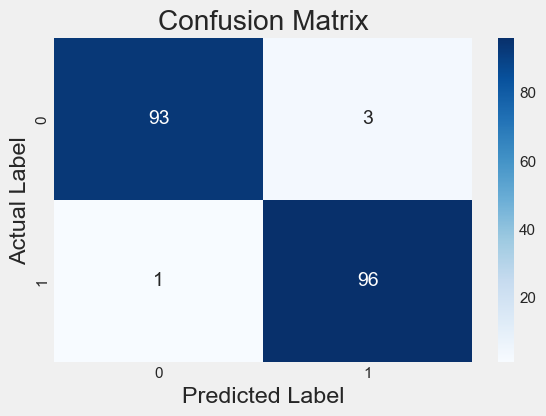

In [104]:
logreg2 = LogisticRegression(random_state=42)
logreg2.fit(X2_train_scaled, y2_train)

eval_classification2(logreg2)

confusion2(logreg2)

## Decision Tree

Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.50
Precision (Test Set): 0.97
Precision (Train Set): 0.00
Recall (Test Set): 0.99
Recall (Train Set): 0.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.50
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9281385281385283
Accuracy: 97.93%
Precision(FP): 96.97%
Recall(FN): 98.97%
F1_Score(FP&FN): 97.96%
ROC_AUC: 97.92%
True Positives (TP): 96
False Positives (FP): 3
True Negatives (TN): 93
False Negatives (FN): 1


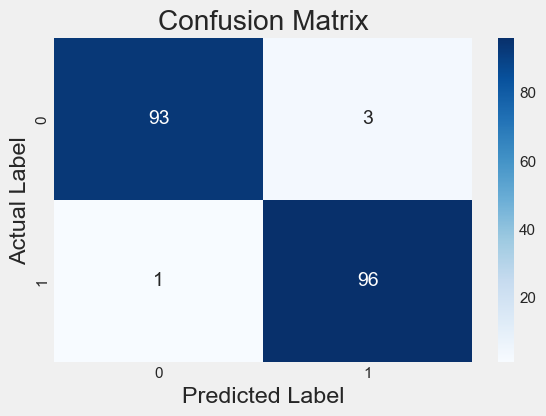

In [106]:
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X2_train_scaled, y2_train)

eval_classification2(dt2)

confusion2(dt2)

## Random Forest

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.50
Precision (Test Set): 0.95
Precision (Train Set): 0.00
Recall (Test Set): 1.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.44
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9580086580086581
Accuracy: 97.41%
Precision(FP): 95.10%
Recall(FN): 100.00%
F1_Score(FP&FN): 97.49%
ROC_AUC: 99.88%
True Positives (TP): 97
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 0


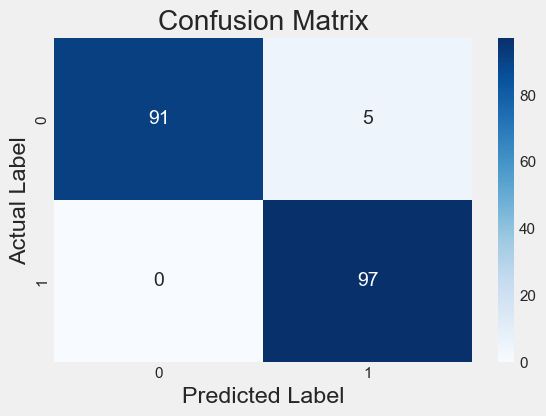

In [108]:
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2_train_scaled, y2_train)

eval_classification2(rf2)

confusion2(rf2)

# K-nearest Neighbours

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.50
Precision (Test Set): 0.97
Precision (Train Set): 0.00
Recall (Test Set): 0.97
Recall (Train Set): 0.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.50
Accuracy (crossval train): 0.7537878787878789
Accuracy (crossval test): 0.6532467532467532
Accuracy: 96.89%
Precision(FP): 96.91%
Recall(FN): 96.91%
F1_Score(FP&FN): 96.91%
ROC_AUC: 99.69%
True Positives (TP): 94
False Positives (FP): 3
True Negatives (TN): 93
False Negatives (FN): 3


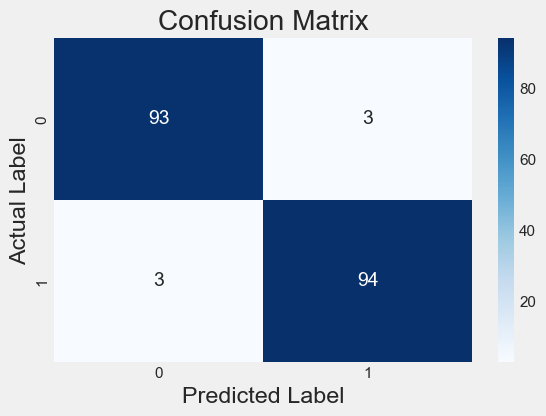

In [110]:
knn2 = KNeighborsClassifier()
knn2.fit(X2_train_scaled, y2_train)

eval_classification2(knn2)

confusion2(knn2)

## Gradient Boosting

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.50
Precision (Test Set): 0.95
Precision (Train Set): 0.50
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.67
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.52
Accuracy (crossval train): 0.9993506493506493
Accuracy (crossval test): 0.9445887445887446
Accuracy: 97.41%
Precision(FP): 95.10%
Recall(FN): 100.00%
F1_Score(FP&FN): 97.49%
ROC_AUC: 99.89%
True Positives (TP): 97
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 0


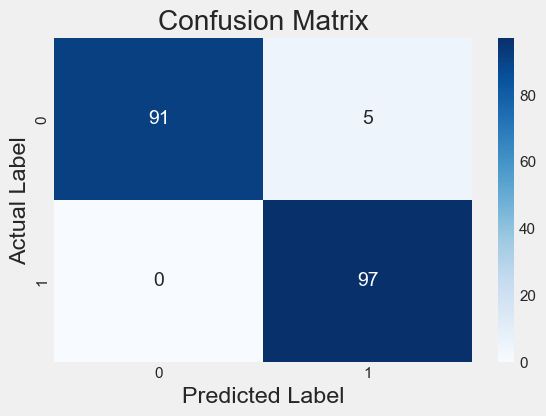

In [112]:
gb2 = GradientBoostingClassifier(random_state=42)
gb2.fit(X2_train_scaled, y2_train)

eval_classification2(gb2)

confusion2(gb2)

# XGBoost

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.50
Precision (Test Set): 0.95
Precision (Train Set): 0.00
Recall (Test Set): 0.99
Recall (Train Set): 0.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.60
Accuracy (crossval train): 1.0
Accuracy (crossval test): 0.9463203463203465
Accuracy: 96.89%
Precision(FP): 95.05%
Recall(FN): 98.97%
F1_Score(FP&FN): 96.97%
ROC_AUC: 99.82%
True Positives (TP): 96
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 1


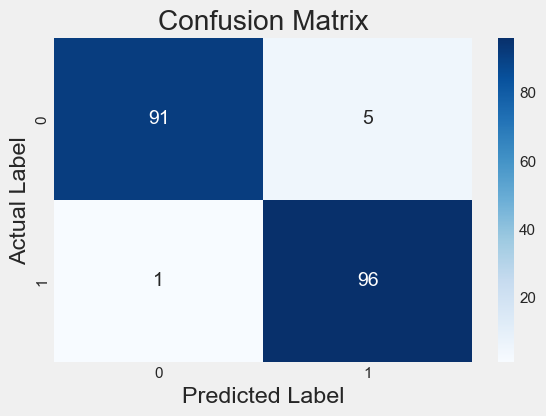

In [114]:

xgb2 = XGBClassifier(nthread=6, tree_method='hist', random_state=42)

xgb2.fit(X2_train_scaled, y2_train)

eval_classification2(xgb2)

confusion2(xgb2)

## Hyperparameter Tuning

In [116]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression2': Pipeline([('scaling', StandardScaler()), ('clf', LogisticRegression(random_state=123))]),
            'decisiontree2':Pipeline([('scaling', StandardScaler()), ('clf', DecisionTreeClassifier(random_state = 123))]),
            'randomforest2':Pipeline([('scaling', StandardScaler()), ('clf', RandomForestClassifier(random_state = 123))]),
            'knn2':Pipeline([('scaling', StandardScaler()), ('clf', KNeighborsClassifier())]),
            'gb2':Pipeline([('scaling', StandardScaler()), ('clf', GradientBoostingClassifier(random_state = 123))]),
            'xgboost2': Pipeline([('scaling', StandardScaler()), ('clf', XGBClassifier(nthread=6, tree_method='hist', random_state=123))])}

#Define Hyperparameters for each pipeline
hyperparameters_lr2 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt2 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf2 ={'clf__n_estimators': [50,60,75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn2 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb2 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb2 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1,3,5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression2':hyperparameters_lr2,
                   'decisiontree2':hyperparameters_dt2,
                   'randomforest2':hyperparameters_rf2,
                   'knn2':hyperparameters_knn2,
                   'gb2':hyperparameters_gb2,
                   'xgboost2': hyperparameters_xgb2}

In [117]:
fitted_models2, fit_time2 = grid_pipe2(pipelines,hyperparameters,scoring='accuracy')

Fitting 15 folds for each of 400 candidates, totalling 6000 fits
The logisticregression2 model has been fitted.
Total Fit Time: 31.490s
Best accuracy: 0.964
Best params:
 {'clf__C': 0.7177373737373738, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'} 

Fitting 15 folds for each of 1000 candidates, totalling 15000 fits
The decisiontree2 model has been fitted.
Total Fit Time: 58.174s
Best accuracy: 0.918
Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 26, 'clf__splitter': 'best'} 

Fitting 15 folds for each of 60 candidates, totalling 900 fits
The randomforest2 model has been fitted.
Total Fit Time: 58.922s
Best accuracy: 0.949
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.2, 'clf__n_estimators': 120} 

Fitting 15 folds for each of 232 candidates, totalling 3480 fits
The knn2 model has been fitted.
Total Fit Time: 

# After Hyperparameter Tuning With Normalization

## Logistic Regression

Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.50
Precision (Test Set): 0.97
Precision (Train Set): 0.00
Recall (Test Set): 0.99
Recall (Train Set): 0.00
F1-Score (Test Set): 0.98
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.50
Accuracy (crossval train): 0.9297619047619048
Accuracy (crossval test): 0.9238095238095239
Accuracy: 97.93%
Precision(FP): 96.97%
Recall(FN): 98.97%
F1_Score(FP&FN): 97.96%
ROC_AUC: 99.85%
True Positives (TP): 96
False Positives (FP): 3
True Negatives (TN): 93
False Negatives (FN): 1


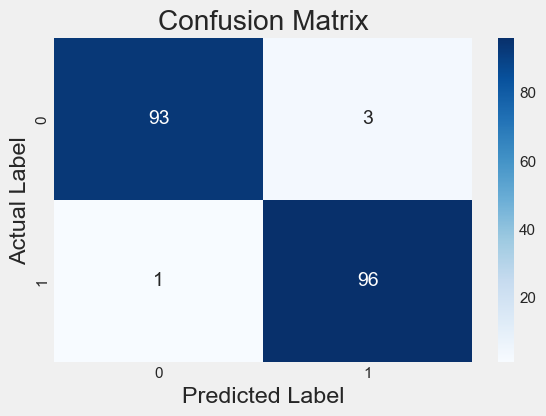

In [120]:
logreg2_tuned = LogisticRegression(random_state=42, C = 0.7177373737373738, max_iter = 10000, penalty = 'l2', solver = 'newton-cg')
logreg2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(logreg2_tuned)

confusion2(logreg2_tuned)

# Decision Tree

Accuracy (Test Set): 0.91
Accuracy (Train Set): 0.50
Precision (Test Set): 0.90
Precision (Train Set): 0.50
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.91
F1-Score (Train Set): 0.67
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.50
Accuracy (crossval train): 0.9524891774891775
Accuracy (crossval test): 0.9160173160173158
Accuracy: 91.19%
Precision(FP): 90.00%
Recall(FN): 92.78%
F1_Score(FP&FN): 91.37%
ROC_AUC: 98.34%
True Positives (TP): 90
False Positives (FP): 10
True Negatives (TN): 86
False Negatives (FN): 7


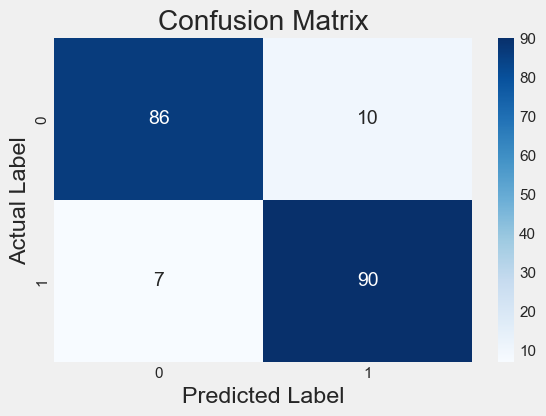

In [122]:
dt2_tuned = DecisionTreeClassifier(random_state=42, criterion = 'gini', max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 26, splitter = 'best')
dt2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(dt2_tuned)

confusion2(dt2_tuned)

## Random Forest

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.50
Precision (Test Set): 0.92
Precision (Train Set): 0.00
Recall (Test Set): 0.99
Recall (Train Set): 0.00
F1-Score (Test Set): 0.96
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.53
Accuracy (crossval train): 0.9518398268398267
Accuracy (crossval test): 0.9493506493506493
Accuracy: 95.34%
Precision(FP): 92.31%
Recall(FN): 98.97%
F1_Score(FP&FN): 95.52%
ROC_AUC: 99.58%
True Positives (TP): 96
False Positives (FP): 8
True Negatives (TN): 88
False Negatives (FN): 1


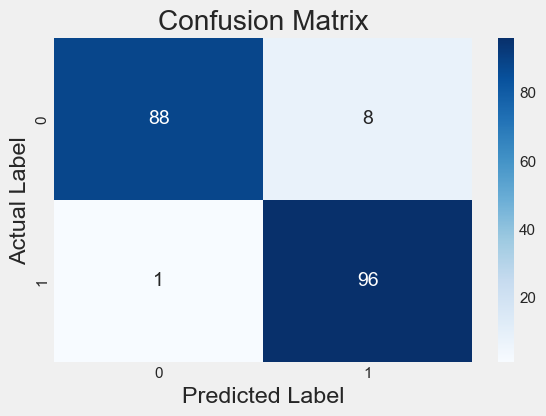

In [124]:

rf2_tuned = RandomForestClassifier(random_state=42, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.2, n_estimators = 120)
rf2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(rf2_tuned)

confusion2(rf2_tuned)

## K-Nearest Neighbours

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.50
Precision (Test Set): 0.95
Precision (Train Set): 0.00
Recall (Test Set): 0.96
Recall (Train Set): 0.00
F1-Score (Test Set): 0.95
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.51
Accuracy (crossval train): 0.7414502164502164
Accuracy (crossval test): 0.6705627705627706
Accuracy: 95.34%
Precision(FP): 94.90%
Recall(FN): 95.88%
F1_Score(FP&FN): 95.38%
ROC_AUC: 99.43%
True Positives (TP): 93
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 4


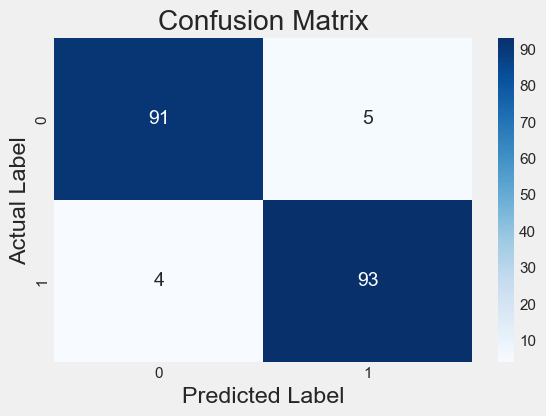

In [126]:
knn2_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 7, p = 1, weights = 'uniform')
knn2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(knn2_tuned)

confusion2(knn2_tuned)

## Gradient Boosting

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.50
Precision (Test Set): 0.94
Precision (Train Set): 0.00
Recall (Test Set): 0.99
Recall (Train Set): 0.00
F1-Score (Test Set): 0.96
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.54
Accuracy (crossval train): 0.9856060606060606
Accuracy (crossval test): 0.9554112554112554
Accuracy: 96.37%
Precision(FP): 94.12%
Recall(FN): 98.97%
F1_Score(FP&FN): 96.48%
ROC_AUC: 99.82%
True Positives (TP): 96
False Positives (FP): 6
True Negatives (TN): 90
False Negatives (FN): 1


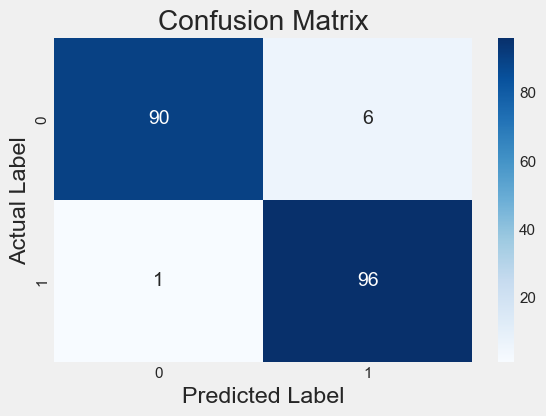

In [128]:
gb2_tuned = GradientBoostingClassifier(random_state=42, criterion = 'friedman_mse', loss = 'exponential', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
gb2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(gb2_tuned)

confusion2(gb2_tuned)

## XGBoost

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.50
Precision (Test Set): 0.95
Precision (Train Set): 0.00
Recall (Test Set): 0.99
Recall (Train Set): 0.00
F1-Score (Test Set): 0.97
F1-Score (Train Set): 0.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.59
Accuracy (crossval train): 0.976839826839827
Accuracy (crossval test): 0.9554112554112554
Accuracy: 96.89%
Precision(FP): 95.05%
Recall(FN): 98.97%
F1_Score(FP&FN): 96.97%
ROC_AUC: 99.84%
True Positives (TP): 96
False Positives (FP): 5
True Negatives (TN): 91
False Negatives (FN): 1


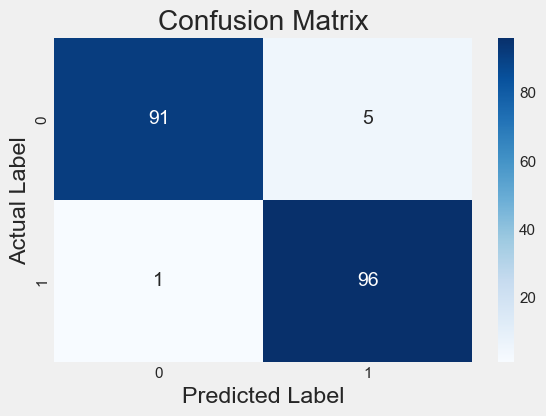

In [130]:
xgb2_tuned = XGBClassifier(nthread=6, tree_method='hist', random_state=42, eta = 0.2578947368421053, max_depth = 1)

xgb2_tuned.fit(X2_train_scaled, y2_train)

eval_classification2(xgb2_tuned)

confusion2(xgb2_tuned)

# Model Comparison

## A. Without Normalization

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Data untuk model tanpa skala
data_no_scaled = {
    "Model": ["logreg", "dt", "rf", "knn", "gb", "xgb"],
    "Accuracy (Test Set)": [0.50, 0.98, 0.97, 0.69, 0.98, 0.97],
    "Accuracy (Train Set)": [0.50, 1.00, 1.00, 0.76, 1.00, 1.00],
    "Precision (Test Set)": [0.00, 0.97, 0.95, 0.69, 0.96, 0.95],
    "Precision (Train Set)": [0.00, 1.00, 1.00, 0.77, 1.00, 1.00],
    "Recall (Test Set)": [0.00, 0.99, 1.00, 0.70, 1.00, 0.99],
    "Recall (Train Set)": [0.00, 1.00, 1.00, 0.75, 1.00, 1.00],
    "F1-Score (Test Set)": [0.00, 0.98, 0.97, 0.70, 0.98, 0.97],
    "F1-Score (Train Set)": [0.00, 1.00, 1.00, 0.76, 1.00, 1.00],
    "roc_auc (test-proba)": [0.80, 0.98, 1.00, 0.78, 1.00, 1.00],
    "roc_auc (train-proba)": [0.76, 1.00, 1.00, 0.84, 1.00, 1.00],
    "Accuracy (crossval train)": [0.496, 1.00, 1.00, 0.754, 0.999, 1.00],
    "Accuracy (crossval test)": [0.496, 0.928, 0.958, 0.653, 0.944, 0.946],
    "Accuracy": ["49.74%", "97.93%", "97.41%", "69.43%", "97.93%", "96.89%"],
    "Precision(FP)": ["0.00%", "96.97%", "95.10%", "69.39%", "96.04%", "95.05%"],
    "Recall(FN)": ["0.00%", "98.97%", "100.00%", "70.10%", "100.00%", "98.97%"],
    "F1_Score(FP&FN)": ["0.00%", "97.96%", "97.49%", "69.74%", "97.98%", "96.97%"],
    "ROC_AUC": ["80.03%", "97.92%", "99.88%", "78.06%", "99.87%", "99.82%"],
    "True Positives (TP)": [0, 96, 97, 68, 97, 96],
    "False Positives (FP)": [0, 3, 5, 30, 4, 5],
    "True Negatives (TN)": [96, 93, 91, 66, 92, 91],
    "False Negatives (FN)": [97, 1, 0, 29, 0, 1],
}

# Data untuk model dengan tuning tanpa skala
data_tuning_no_scaled = {
    "Model": ["logreg", "dt", "rf", "knn", "gb", "xgb"],
    "Accuracy (Test Set)": [0.98, 0.91, 0.95, 0.71, 0.96, 0.97],
    "Accuracy (Train Set)": [0.95, 0.94, 0.95, 0.72, 0.98, 0.98],
    "Precision (Test Set)": [0.98, 0.90, 0.92, 0.75, 0.94, 0.95],
    "Precision (Train Set)": [0.98, 0.93, 0.96, 0.78, 0.99, 0.99],
    "Recall (Test Set)": [0.99, 0.93, 0.99, 0.63, 0.99, 0.99],
    "Recall (Train Set)": [0.93, 0.95, 0.94, 0.62, 0.97, 0.96],
    "F1-Score (Test Set)": [0.98, 0.91, 0.96, 0.69, 0.96, 0.97],
    "F1-Score (Train Set)": [0.95, 0.94, 0.95, 0.69, 0.98, 0.98],
    "roc_auc (test-proba)": [1.00, 0.98, 1.00, 0.78, 1.00, 1.00],
    "roc_auc (train-proba)": [0.99, 0.99, 0.99, 0.77, 1.00, 1.00],
    "Accuracy (crossval train)": [0.918, 0.952, 0.951, 0.715, 0.986, 0.977],
    "Accuracy (crossval test)": [0.915, 0.916, 0.949, 0.705, 0.955, 0.955],
    "Accuracy": ["98.45%", "91.19%", "95.34%", "70.98%", "96.37%", "96.89%"],
    "Precision(FP)": ["97.96%", "90.00%", "92.31%", "75.31%", "94.12%", "95.05%"],
    "Recall(FN)": ["98.97%", "92.78%", "98.97%", "62.89%", "98.97%", "98.97%"],
    "F1_Score(FP&FN)": ["98.46%", "91.37%", "95.52%", "68.54%", "96.48%", "96.97%"],
    "ROC_AUC": ["99.90%", "98.34%", "99.58%", "78.48%", "99.82%", "99.84%"],
    "True Positives (TP)": [96, 90, 96, 61, 96, 96],
    "False Positives (FP)": [2, 10, 8, 20, 6, 5],
    "True Negatives (TN)": [94, 86, 88, 76, 90, 91],
    "False Negatives (FN)": [1, 7, 1, 36, 1, 1],
}

# Membuat DataFrame
df_no_scaled = pd.DataFrame(data_no_scaled)
df_tuning_no_scaled = pd.DataFrame(data_tuning_no_scaled)

# Menampilkan tabel memanjang
print("Data Model Tanpa Skala:")
print(df_no_scaled.to_string(index=False))

print("\nData Model dengan Tuning Tanpa Skala:")
print(df_tuning_no_scaled.to_string(index=False))

Data Model Tanpa Skala:
 Model  Accuracy (Test Set)  Accuracy (Train Set)  Precision (Test Set)  Precision (Train Set)  Recall (Test Set)  Recall (Train Set)  F1-Score (Test Set)  F1-Score (Train Set)  roc_auc (test-proba)  roc_auc (train-proba)  Accuracy (crossval train)  Accuracy (crossval test) Accuracy Precision(FP) Recall(FN) F1_Score(FP&FN) ROC_AUC  True Positives (TP)  False Positives (FP)  True Negatives (TN)  False Negatives (FN)
logreg                 0.50                  0.50                  0.00                   0.00               0.00                0.00                 0.00                  0.00                  0.80                   0.76                      0.496                     0.496   49.74%         0.00%      0.00%           0.00%  80.03%                    0                     0                   96                    97
    dt                 0.98                  1.00                  0.97                   1.00               0.99                1.00     

## B. With Normalization

In [135]:
import pandas as pd

# Data untuk model yang di-scaled
data_scaled = {
    "Model": ["Logreg", "DT", "RF", "KNN", "GB", "XGB"],
    "Accuracy (Test Set)": [0.98, 0.98, 0.97, 0.97, 0.97, 0.97],
    "Accuracy (Train Set)": [0.50, 0.50, 0.50, 0.50, 0.50, 0.50],
    "Precision (Test Set)": [0.97, 0.97, 0.95, 0.97, 0.95, 0.95],
    "Precision (Train Set)": [0.00, 0.00, 0.00, 0.00, 0.50, 0.00],
    "Recall (Test Set)": [0.99, 0.99, 1.00, 0.97, 1.00, 0.99],
    "Recall (Train Set)": [0.00, 0.00, 0.00, 0.00, 1.00, 0.00],
    "F1-Score (Test Set)": [0.98, 0.98, 0.97, 0.97, 0.97, 0.97],
    "F1-Score (Train Set)": [0.00, 0.00, 0.00, 0.00, 0.67, 0.00],
    "roc_auc (test-proba)": [1.00, 0.98, 1.00, 1.00, 1.00, 1.00],
    "roc_auc (train-proba)": [0.50, 0.50, 0.44, 0.50, 0.52, 0.60],
    "Accuracy (crossval train)": [0.4961, 1.00, 1.00, 0.7538, 0.9994, 1.00],
    "Accuracy (crossval test)": [0.4961, 0.9281, 0.9580, 0.6532, 0.9446, 0.9463],
    "Accuracy": ["97.93%", "97.93%", "97.41%", "96.89%", "97.41%", "96.89%"],
    "Precision (FP)": ["96.97%", "96.97%", "96.97%", "96.91%", "95.10%", "95.05%"],
    "Recall (FN)": ["98.97%", "98.97%", "98.97%", "96.91%", "100.00%", "98.97%"],
    "F1_Score (FP&FN)": ["97.96%", "97.96%", "97.96%", "96.91%", "97.49%", "96.97%"],
    "ROC_AUC": ["99.85%", "97.92%", "97.92%", "99.69%", "99.89%", "99.82%"],
    "True Positives (TP)": [96, 96, 96, 94, 97, 96],
    "False Positives (FP)": [3, 3, 3, 3, 5, 5],
    "True Negatives (TN)": [93, 93, 93, 93, 91, 91],
    "False Negatives (FN)": [1, 1, 1, 3, 0, 1],
}

# Data untuk model yang di-tuning
data_tuning = {
    "Model": ["Logreg", "DT", "RF", "KNN", "GB", "XGB"],
    "Accuracy (Test Set)": [0.98, 0.91, 0.95, 0.95, 0.96, 0.97],
    "Accuracy (Train Set)": [0.50, 0.50, 0.50, 0.50, 0.50, 0.50],
    "Precision (Test Set)": [0.97, 0.90, 0.92, 0.95, 0.94, 0.95],
    "Precision (Train Set)": [0.00, 0.50, 0.00, 0.00, 0.00, 0.00],
    "Recall (Test Set)": [0.99, 0.93, 0.99, 0.96, 0.99, 0.99],
    "Recall (Train Set)": [0.00, 1.00, 0.00, 0.00, 0.00, 0.00],
    "F1-Score (Test Set)": [0.98, 0.91, 0.96, 0.95, 0.96, 0.97],
    "F1-Score (Train Set)": [0.00, 0.67, 0.00, 0.00, 0.00, 0.00],
    "roc_auc (test-proba)": [1.00, 0.98, 1.00, 0.99, 1.00, 1.00],
    "roc_auc (train-proba)": [0.50, 0.50, 0.53, 0.51, 0.54, 0.59],
    "Accuracy (crossval train)": [0.93, 0.95, 0.95, 0.74, 0.99, 0.98],
    "Accuracy (crossval test)": [0.92, 0.92, 0.95, 0.67, 0.96, 0.96],
    "Accuracy (Overall)": ["97.93%", "91.19%", "95.34%", "95.34%", "96.37%", "96.89%"],
    "Precision (FP)": ["96.97%", "90.00%", "92.31%", "94.90%", "94.12%", "95.05%"],
    "Recall (FN)": ["98.97%", "92.78%", "98.97%", "95.88%", "98.97%", "98.97%"],
    "F1_Score (FP&FN)": ["97.96%", "91.37%", "95.52%", "95.38%", "96.48%", "96.97%"],
    "ROC_AUC": ["99.85%", "98.34%", "99.58%", "99.43%", "99.82%", "99.84%"],
    "True Positives (TP)": [96, 90, 96, 93, 96, 96],
    "False Positives (FP)": [3, 10, 8, 5, 6, 5],
    "True Negatives (TN)": [93, 86, 88, 91, 90, 91],
    "False Negatives (FN)": [1, 7, 1, 4, 1, 1],
}

# Membuat DataFrame
df_scaled = pd.DataFrame(data_scaled)
df_tuning = pd.DataFrame(data_tuning)

# Menampilkan tabel memanjang
print("Data Model Tanpa Skala:")
print(df_scaled.to_string(index=False))

print("\nData Model dengan Tuning Tanpa Skala:")
print(df_tuning.to_string(index=False))

Data Model Tanpa Skala:
 Model  Accuracy (Test Set)  Accuracy (Train Set)  Precision (Test Set)  Precision (Train Set)  Recall (Test Set)  Recall (Train Set)  F1-Score (Test Set)  F1-Score (Train Set)  roc_auc (test-proba)  roc_auc (train-proba)  Accuracy (crossval train)  Accuracy (crossval test) Accuracy Precision (FP) Recall (FN) F1_Score (FP&FN) ROC_AUC  True Positives (TP)  False Positives (FP)  True Negatives (TN)  False Negatives (FN)
Logreg                 0.98                   0.5                  0.97                    0.0               0.99                 0.0                 0.98                  0.00                  1.00                   0.50                     0.4961                    0.4961   97.93%         96.97%      98.97%           97.96%  99.85%                   96                     3                   93                     1
    DT                 0.98                   0.5                  0.97                    0.0               0.99                 0.

# Learning Curve Random Forest Without Normalization 

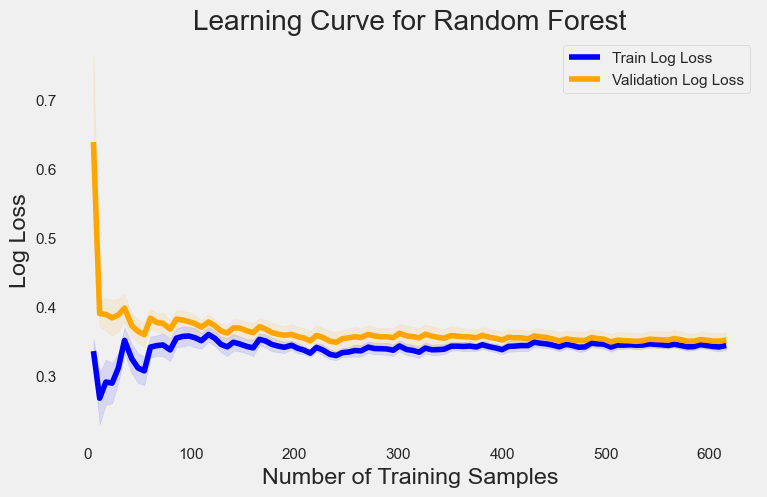

In [137]:
# Importing Required Libraries and Modules
from sklearn.model_selection import learning_curve, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Definisikan model Random Forest
rf1_tuned = RandomForestClassifier(random_state=42, criterion='entropy', max_features='sqrt', min_samples_leaf=0.2, n_estimators=120)

# Buat pipeline
model = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', rf1_tuned)
])

# Obtain scores from learning curve function
cv = RepeatedStratifiedKFold(random_state=42, n_repeats=3)
sizes, training_scores, testing_scores = learning_curve(estimator=model, X=X1_train, y=y1_train, cv=cv, scoring='neg_log_loss', train_sizes=np.linspace(0.01, 1, 100))

# Mean and Standard Deviation of training scores
mean_training = -np.mean(training_scores, axis=1)
std_deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = -np.mean(testing_scores, axis=1)
std_deviation_testing = np.std(testing_scores, axis=1)

# Plotting the Learning Curve
plt.figure(figsize=(8, 5))
plt.plot(sizes, mean_training, label='Train Log Loss', color='blue')
plt.plot(sizes, mean_testing, label='Validation Log Loss', color='orange')
plt.fill_between(sizes, mean_training - std_deviation_training, mean_training + std_deviation_training, color='blue', alpha=0.1)
plt.fill_between(sizes, mean_testing - std_deviation_testing, mean_testing + std_deviation_testing, color='orange', alpha=0.1)
plt.xlabel('Number of Training Samples')
plt.ylabel('Log Loss')
plt.title('Learning Curve for Random Forest')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix & Features Importance

Accuracy: 95.19%
Precision: 96.31%
Recall: 94.07%
F1_Score: 95.18%
ROC_AUC: 98.61%


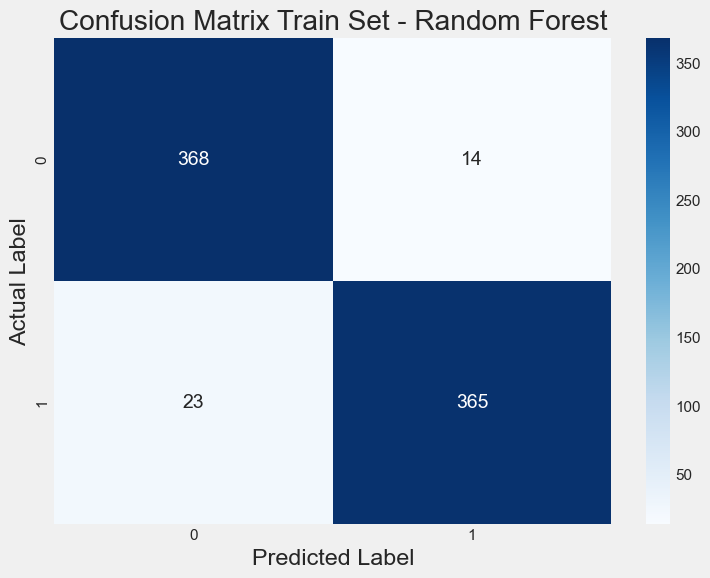

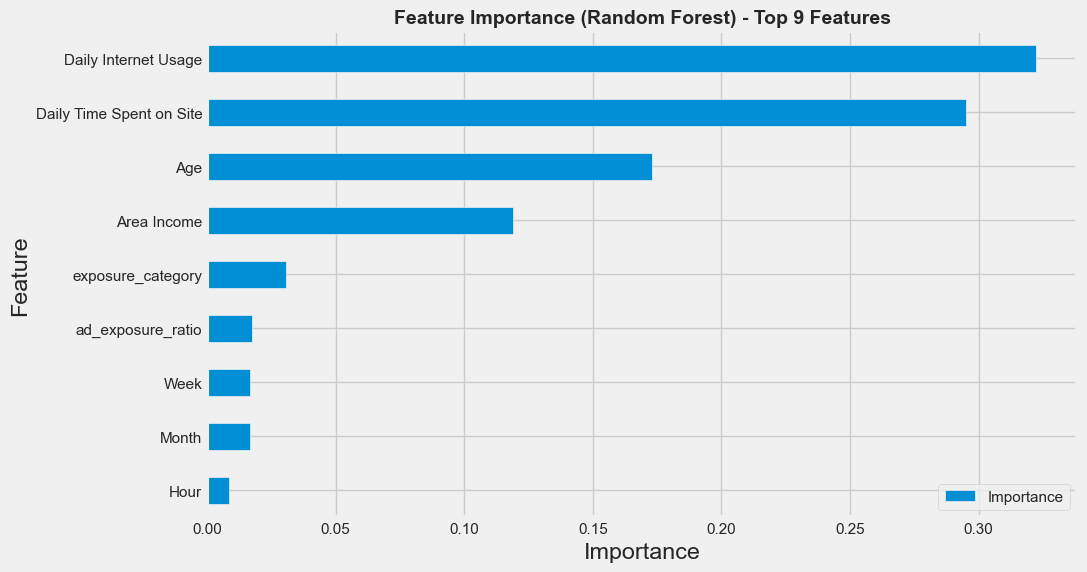

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Melatih model Random Forest
rf1_tuned = RandomForestClassifier(random_state=42, criterion='entropy', max_features='sqrt', 
                                    min_samples_leaf=0.2, n_estimators=120)
rf1_tuned.fit(X1_train, y1_train)

# Fungsi untuk evaluasi model pada data pelatihan
def eval_train(model, X_train, y_train):
    # Memprediksi probabilitas dan label pada data pelatihan
    y_pred_proba = model.predict_proba(X_train)
    y_predict = model.predict(X_train)

    # Menghitung dan mencetak metrik performa
    print('Accuracy: %.2f%%' % (accuracy_score(y_train, y_predict) * 100))
    print('Precision: %.2f%%' % (precision_score(y_train, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y_train, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_train, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y_train, y_pred_proba[:, 1]) * 100))

    # Menghitung confusion matrix
    confusion_matrix_model = confusion_matrix(y_train, y_predict)

    # Menampilkan confusion matrix
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title('Confusion Matrix Train Set - Random Forest')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

# Evaluasi model
eval_train(rf1_tuned, X1_train, y1_train)

# Mendapatkan feature importance
feature_importance = pd.DataFrame({
    'Feature': X1_train.columns, 
    'Importance': rf1_tuned.feature_importances_
})

# Mengurutkan dan memilih 9 fitur teratas berdasarkan importance
feature_importance = feature_importance.sort_values('Importance', ascending=True)
top_features = feature_importance.tail(9)

# Membuat plot horizontal bar chart untuk fitur importance
top_features.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance (Random Forest) - Top 9 Features', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy (Test Set): 0.95
Accuracy (Train Set): 0.95
Precision (Test Set): 0.92
Precision (Train Set): 0.96
Recall (Test Set): 0.99
Recall (Train Set): 0.94
F1-Score (Test Set): 0.96
F1-Score (Train Set): 0.95
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.99
Accuracy (crossval train): 0.9518398268398267
Accuracy (crossval test): 0.9493506493506493
Accuracy: 95.34%
Precision(FP): 92.31%
Recall(FN): 98.97%
F1_Score(FP&FN): 95.52%
ROC_AUC: 99.58%
True Positives (TP): 96
False Positives (FP): 8
True Negatives (TN): 88
False Negatives (FN): 1


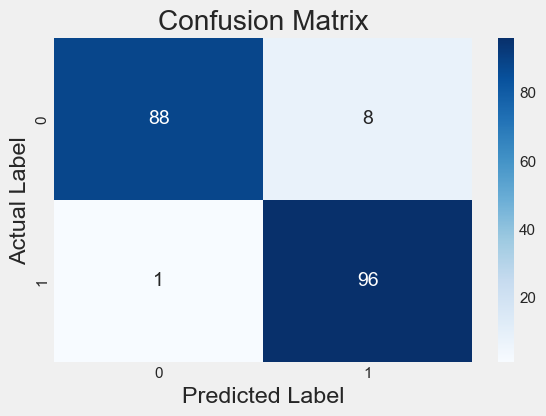

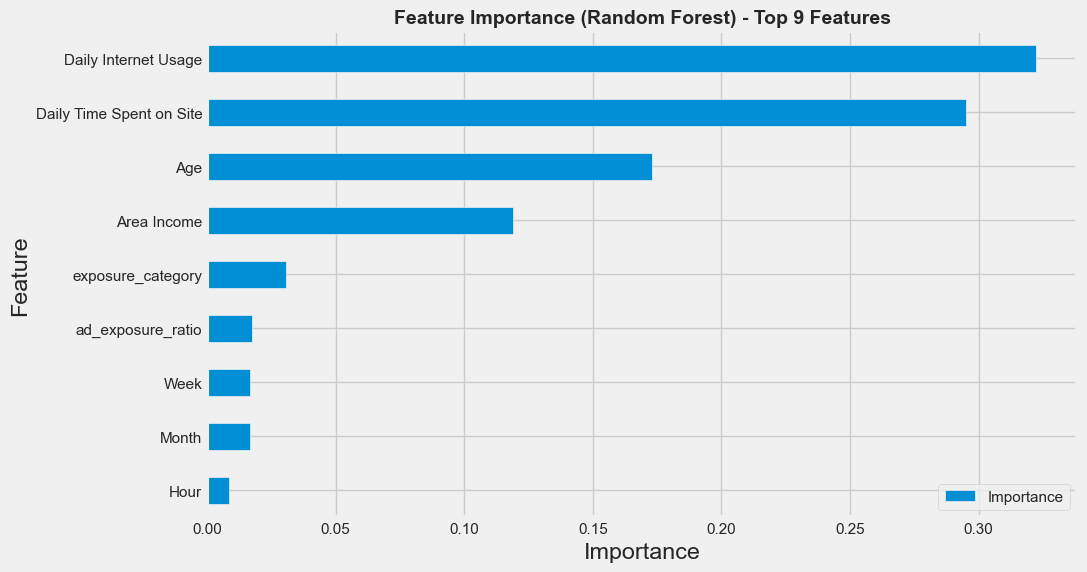

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Melatih model Random Forest
rf1_tuned = RandomForestClassifier(random_state=42, criterion='entropy', max_features='sqrt', 
                                    min_samples_leaf=0.2, n_estimators=120)
rf1_tuned.fit(X1_train, y1_train)

# Evaluasi model
eval_classification1(rf1_tuned)

# Menampilkan confusion matrix
confusion1(rf1_tuned)

# Mendapatkan feature importance
feature_importance = pd.DataFrame({
    'Feature': X1_train.columns, 
    'Importance': rf1_tuned.feature_importances_
})

# Mengurutkan dan memilih 9 fitur teratas berdasarkan importance
feature_importance = feature_importance.sort_values('Importance', ascending=True)
top_features = feature_importance.tail(9)

# Membuat plot horizontal bar chart untuk fitur importance
top_features.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance (Random Forest) - Top 9 Features', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

1. True Positives (TP) = 96:
Ini berarti ada 96 pelanggan yang benar-benar mengklik iklan dan diprediksi dengan benar oleh model sebagai pelanggan yang mengklik iklan.
Signifikansi: Menunjukkan bahwa model bekerja dengan baik dalam mengidentifikasi pelanggan yang potensial untuk mengklik iklan, yang penting dalam menentukan target pemasaran.
2. True Negatives (TN) = 88:
Sebanyak 88 pelanggan tidak mengklik iklan dan model memprediksi dengan benar bahwa mereka tidak akan mengklik iklan.
Signifikansi: Ini mengindikasikan bahwa model cukup akurat dalam memprediksi pelanggan yang tidak tertarik pada iklan, yang dapat menghemat biaya dengan tidak menargetkan mereka.
3. False Positives (FP) = 8:
Sebanyak 8 pelanggan diprediksi akan mengklik iklan, namun sebenarnya mereka tidak mengklik.
Signifikansi: False positives menyebabkan pengeluaran yang tidak efisien, karena iklan ditargetkan kepada pelanggan yang sebenarnya tidak tertarik. Namun, dengan hanya 8 kesalahan ini, model terlihat cukup efisien.
4. False Negatives (FN) = 1:
Ada 1 pelanggan yang seharusnya mengklik iklan tetapi diprediksi tidak mengklik.
Signifikansi: False negatives berarti potensi keuntungan hilang karena pelanggan yang seharusnya mengklik iklan tidak ditargetkan dengan baik. Namun, hanya 1 kesalahan dalam kategori ini menunjukkan model sangat baik dalam mengidentifikasi pelanggan yang akan mengklik iklan.
5. Metrik Evaluasi Berdasarkan Confusion Matrix:
Accuracy:
Akurasi= (TP+TN)/ (FP+FN+TP+TN) = (96+88) / (8+1+96+88) * 100% = 95.3%



Hasil Confusion Matrix set pengujian di samping :  

Dari 97 orang yang mengklik iklan (Label 1), algoritme mengklasifikasikan 96 di antaranya dengan benar dan hanya 1 yang salah mengklasifikasikannya. 

Demikian pula, dari 96 (Label 0) orang yang tidak mengklik iklan, algoritme mengklasifikasikan 88 orang dengan benar dan hanya 8 yang salah mengklasifikasikannya.

Berdasarkan hasil Confusion Matrix baik untuk train set maupun test set serta analisis metrik evaluasi lainnya, terlihat bahwa Regresi Logistik merupakan model yang sangat mumpuni untuk diimplementasikan pada dataset ini


- Daily Time Spent on Site : 
berpengaruh lebih besar terhadap kemungkinan pengguna mengklik iklan, karena semakin lama waktu yang dihabiskan di situs, semakin tinggi kemungkinan terpapar dan berinteraksi dengan iklan. Oleh karena itu, pengiklan dapat memfokuskan upaya mereka pada pengguna yang aktif lebih lama di situs.

- Daily Internet Usage :
juga mempengaruhi berarti frekuensi atau intensitas seseorang menggunakan internet dalam sehari. Ini adalah ukuran kuantitatif yang menunjukkan seberapa sering seseorang terhubung ke internet dan melakukan aktivitas online terlepas dari platform atau situs web yang dikunjungi. 

Kesimpulan : Pengiklan sebaiknya menargetkan pengguna yang menghabiskan banyak waktu di situs tertentu, sementara pemilik situs dapat meningkatkan daya tarik situs (relevansi iklan, desain iklan, dan pengalaman pengguna) untuk memperpanjang waktu pengguna dan meningkatkan peluang klik iklan.


Insight yang Dapat Diambil:
- Targeting iklan: Dengan mengetahui bahwa waktu di situs memainkan peran besar, pengiklan dapat memprioritaskan menargetkan pengguna yang aktif lebih lama di situs, karena mereka lebih mungkin untuk melihat dan mengklik iklan.
- Optimalisasi pengalaman pengguna: Dengan pemahaman ini, pemilik situs dapat merancang pengalaman situs yang lebih menarik, memastikan pengguna menghabiskan lebih banyak waktu, yang secara langsung meningkatkan peluang klik iklan.
- Perbedaan penggunaan internet secara umum: Meskipun penting, penggunaan internet harian secara keseluruhan menunjukkan bahwa hanya sebagian waktu pengguna yang dihabiskan di situs tertentu berpengaruh langsung pada potensi iklan.

# Bisnis Rekomendasi

Berdasarkan hasil analisis Feature Importance, kelompok usia memainkan peran signifikan dalam memberikan rekomendasi bisnis. Terutama, kelompok usia Dewasa Muda (19-30 tahun) dan Dewasa (31-50 tahun) menunjukkan kontribusi yang besar terhadap keputusan bisnis.

1. Kelompok Usia Dewasa (31-50 tahun):
Kelompok usia ini terbukti menjadi target utama dengan preferensi yang jelas pada sektor otomotif, properti (house), dan perbankan. Rekomendasi bisnis untuk kelompok ini dapat mencakup:

Otomotif: Fokus pada pengembangan produk kendaraan pribadi, layanan after-sales, leasing kendaraan, atau penawaran mobil listrik yang lebih ramah lingkungan.
Properti: Pengembangan perumahan untuk keluarga, apartemen, dan investasi properti komersial. Program KPR atau layanan konsultasi investasi properti dapat menjadi strategi yang kuat.
Perbankan: Produk seperti tabungan, pinjaman rumah, dan investasi pensiun akan menarik perhatian. Kampanye yang menargetkan perencanaan keuangan jangka panjang sangat relevan untuk kelompok ini.

2. Kelompok Usia Dewasa Muda (19-30 tahun):
Di sisi lain, kelompok Dewasa Muda menunjukkan minat lebih terhadap sektor kesehatan, keuangan, dan makanan. Beberapa rekomendasi bisnis untuk target ini meliputi:

Kesehatan: Tren gaya hidup sehat, produk-produk kebugaran, serta aplikasi kesehatan digital dan telemedicine dapat menjadi fokus utama. Bisnis dapat menawarkan produk seperti suplemen nutrisi, program diet, atau kelas kebugaran virtual.
Keuangan: Layanan keuangan berbasis teknologi seperti fintech, aplikasi investasi mikro, dan edukasi keuangan untuk generasi muda. Solusi ini akan menarik bagi mereka yang baru memulai karir dan ingin mengelola keuangan pribadi secara lebih baik.
Makanan: Penawaran makanan sehat, meal prep yang praktis, dan layanan pesan antar makanan menjadi tren di kalangan dewasa muda. Bisnis bisa mengeksplorasi kolaborasi dengan platform pengantaran makanan, serta menawarkan produk makanan organik atau berbasis keberlanjutan.

3. Pengembangan Potensi Dewasa Muda:
Walaupun kelompok usia dewasa mendominasi saat ini, kelompok Dewasa Muda memiliki potensi besar yang perlu digali lebih dalam. Mereka adalah generasi yang dinamis dan lebih adaptif terhadap teknologi serta perubahan gaya hidup. Beberapa strategi pengembangan bisa mencakup:

Pemasaran berbasis digital: Kampanye media sosial, influencer marketing, dan pengalaman pelanggan yang interaktif. Dewasa muda cenderung mencari pengalaman yang lebih personal dan berbasis komunitas.
Program loyalitas dan keberlanjutan: Menawarkan program loyalitas yang relevan untuk kategori kesehatan dan makanan, serta kampanye produk yang menekankan keberlanjutan bisa menjadi daya tarik besar bagi kelompok ini.
Dengan mengadopsi pendekatan segmentasi yang lebih fokus dan mempertimbangkan tren gaya hidup serta kebutuhan keuangan yang unik dari kedua kelompok ini, bisnis dapat mengembangkan strategi yang lebih efektif dan berkelanjutan untuk meningkatkan konversi dan loyalitas pelanggan di setiap segmen usia.

# Simulasi Bisnis 

A. Asumsi Marketing (500 Klik dari 1000 User):
Total Klik: 500 (dari 1000 pengguna)
Interested Prospects (30%) : 30% dari 500 = 150 orang
Non-Interested Prospects (70%) : 70% dari 500 = 350 orang
Conversion Rate (CVR) : 50% (asumsi setengah dari yang tertarik akan melakukan konversi)
Expected Total Conversions : 50% dari 150 = 75 orang
Average Transaction Value : Rp 500.000
- Expected Revenue : 
	Total Revenue = 75×500.000 = Rp 37.500.000
<br>

</p>
B. Hasil Model Machine Learning (193 Klik):
TP : 96 orang,		TN : 88 orang,
FP : 8 orang, 		FN : 1 orang

- Perhitungan Conversion Rate (CVR) untuk Model ML:
	CVR = ((TP+FP)/(FN+TP+FP))​×100 =
	((96+8)/(1+96+8))​×100 = (104​×105)/100 = 99.05%

- Perhitungan Revenue untuk Model ML:
	Total Revenue = (TP+FP)×500.000 
		 = 104×500.000
		 = Rp 52.000.000


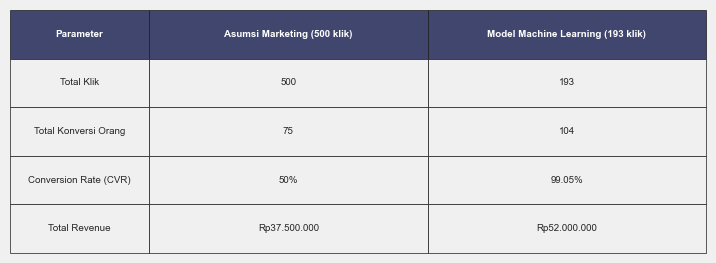

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Data
data = {
    'Parameter': ['Total Klik', 'Total Konversi Orang', 'Conversion Rate (CVR)', 'Total Revenue'],
    'Asumsi Marketing (500 klik)': ['500', '75', '50%', 'Rp37.500.000'],
    'Model Machine Learning (193 klik)': ['193', '104', '99.05%', 'Rp52.000.000']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengatur ukuran tabel
fig, ax = plt.subplots(figsize=(8, 3))

# Menyembunyikan sumbu
ax.axis('off')

# Membuat tabel
table = Table(ax, bbox=[0, 0, 1, 1])

# Mengatur lebar kolom
n_rows, n_cols = df.shape
widths = [0.2] + [0.4] * (n_cols - 1)
heights = [0.2] * (n_rows + 1)

# Membuat header
for j, col in enumerate(df.columns):
    cell = table.add_cell(0, j, width=widths[j], height=heights[0], text=col, loc='center', facecolor='#40466e')
    cell.get_text().set_color('w')
    cell.get_text().set_weight('bold')

# Membuat sel data
for i in range(n_rows):
    for j, val in enumerate(df.iloc[i]):
        table.add_cell(i + 1, j, width=widths[j], height=heights[i + 1], text=val, loc='center', facecolor='#f0f0f0')

# Menambahkan tabel ke plot
ax.add_table(table)

plt.show()

Model Machine Learning memberikan hasil yang lebih baik karena lebih efisien dalam menargetkan audiens yang tepat dan memaksimalkan konversi. Dengan CVR yang jauh lebih tinggi, model ML berhasil menghasilkan lebih banyak pendapatan meskipun jumlah kliknya lebih sedikit. Sebaliknya, meskipun asumsi marketing memiliki lebih banyak klik, targeting yang lebih umum dan kurang spesifik menyebabkan konversi yang lebih rendah dan pendapatan yang lebih rendah.

Secara keseluruhan, penggunaan Machine Learning dalam marketing lebih efektif dalam mengoptimalkan sumber daya dan menghasilkan ROI yang lebih tinggi dibandingkan dengan metode pemasaran konvensional yang lebih umum.
